In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.regression.linear_model import  OLS
from statsmodels.stats.anova import anova_lm
import tensorflow as tf
from scipy import stats
pd.pandas.set_option('display.max_columns',None)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import  PolynomialFeatures

In [144]:
df=pd.read_csv('SCMS_Delivery_History_Dataset.csv',  ) # read the csv data
df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,NaN,Test kit,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,Date Not Captured,27-Aug-06,27-Aug-06,27-Aug-06,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,NaN,Test kit,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,1-Sep-06,1-Sep-06,1-Sep-06,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,11-Aug-06,11-Aug-06,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [145]:
df.describe(include = 'object')

,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD)
count,10324,10324,10324,10324,10324,10324,10324,10324,9964,10324,10324,10324,10324,10324,10324,10324,10324,10324,10324,10324,8588,10324,10324,10324,10324,10324
unique,142,1237,6233,7030,43,4,2,8,4,765,897,2006,2093,2042,5,6,73,184,86,48,54,17,88,2,4688,6733
top,116-ZA-T30,Pre-PQ Process,SCMS-199289,ASN-19166,South Africa,PMO - US,From RDC,N/A - From RDC,Air,Pre-PQ Process,N/A - From RDC,29-Aug-14,29-Aug-14,29-Aug-14,ARV,Adult,SCMS from RDC,"Efavirenz 600mg, tablets, 30 Tabs",Efavirenz,Generic,300mg,Tablet,"Aurobindo Unit III, India",Yes,Weight Captured Separately,Freight Included in Commodity Cost
freq,768,2681,67,54,1406,10265,5404,5404,6113,2476,5404,97,74,67,8550,6595,5404,755,1125,7285,990,3532,3172,7030,1507,1442


In [146]:
df.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

In [147]:
df['PQ #'].nunique()

1237

<Axes: >

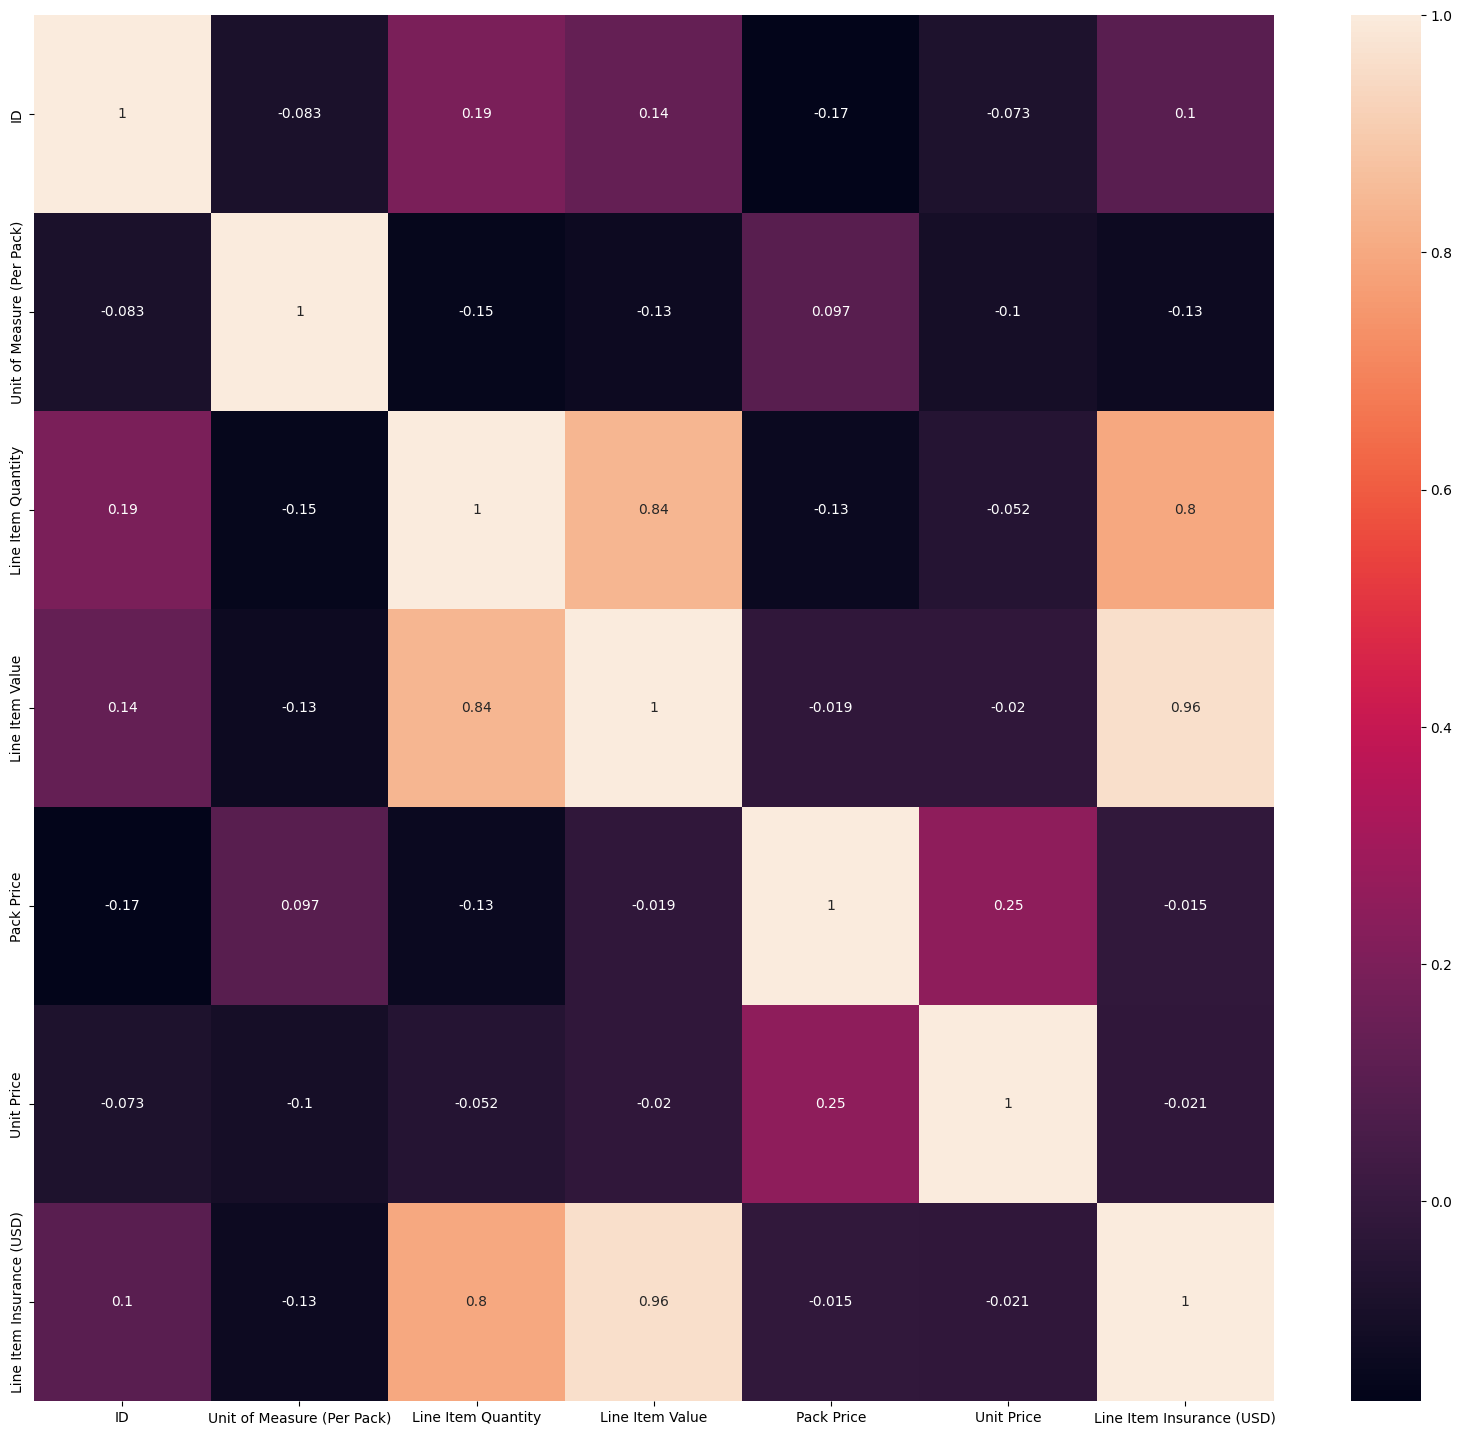

In [148]:

plt.figure(figsize = (20,18))
sns.heatmap(df.corr(), annot = True)

In [149]:
df.isnull().sum()


ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

In [150]:
# Function to extract the ID from a string
def find_id(x):
    x = str(x)
    if x.find('#') != -1:
        # Extract the ID by finding the index of '#' and adding 2 to skip the '#' and the space after it
        a = x.index('#') + 2
        return int(x[a:-1])
    else:
        return 0

# Function to extract the ASN (Assessment Serial Number) from a string
def find_asn(x):
    x = str(x)
    if x.find('(') != -1:
        # Extract the ASN by finding the index of '(' and subtracting 1 to exclude the space before it
        a = x.index('(') - 1
        return x[4:a]
    else:
        return 0

# Function to retrieve the freight cost based on the given ID
def cost(x, df=df):
    if x == 0:
        return x
    else:
        return df[df['ID'] == x]['Freight Cost (USD)'].values[0]

# Function to retrieve the weight based on the given ID
def weight(x, df=df):
    if x == 0:
        return x
    else:
        return df[df['ID'] == x]['Weight (Kilograms)'].values[0]

# Mapping the 'Freight_cost_See_ID' column with the extracted ID using the 'find_id' function
df['Freight_cost_See_ID'] = df['Freight Cost (USD)'].map(find_id)

# Mapping the 'Freight_cost_See_ASN' column with the extracted ASN using the 'find_asn' function
# df['Freight_cost_See_ASN'] = df['Freight Cost (USD)'].map(find_asn)

# Mapping the 'Freight_cost_using_ID' column with the freight cost using the ID from 'Freight_cost_See_ID' column
df['Freight_cost_using_ID'] = df['Freight_cost_See_ID'].map(cost)

# Mapping the 'Weight_See_ID' column with the extracted ID using the 'find_id' function
df['Weight_See_ID'] = df['Weight (Kilograms)'].map(find_id)

# Mapping the 'weight_using_ID' column with the weight using the ID from 'Weight_See_ID' column
df['weight_using_ID'] = df['Weight_See_ID'].map(weight)
# --------------------------------------------------------------------------------------------------------------------------------------------------#

# Selecting specific columns and creating a new dataframe object
a = df[['ID', 'Freight Cost (USD)', 'Freight_cost_See_ID', 'Freight_cost_using_ID']]

# Storing the values extracted from the data to 'Freight Cost (USD)'
a.loc[a['Freight_cost_See_ID'] != 0, 'Freight Cost (USD)'] = a.loc[a['Freight_cost_See_ID'] != 0, 'Freight_cost_using_ID']
df['Freight Cost (USD)'] = a['Freight Cost (USD)']

# Replacing 'Freight Included in Commodity Cost' with 'Line Item Value' in 'Freight Cost (USD)'
df.loc[df['Freight Cost (USD)'] == 'Freight Included in Commodity Cost', 'Freight Cost (USD)'] = df.loc[df['Freight Cost (USD)'] == 'Freight Included in Commodity Cost', 'Line Item Value']

# Replacing 'Invoiced Separately' with 'Line Item Value' in 'Freight Cost (USD)'
df.loc[df['Freight Cost (USD)'] == 'Invoiced Separately', 'Freight Cost (USD)'] = df.loc[df['Freight Cost (USD)'] == 'Invoiced Separately', 'Line Item Value']

# Converting 'Freight Cost (USD)' to float data type
df['Freight Cost (USD)'] = df['Freight Cost (USD)'].astype('float64')

# Replacing non-zero 'Weight_See_ID' values with 'weight_using_ID' in 'Weight (Kilograms)'
df.loc[df['Weight_See_ID'] != 0, 'Weight (Kilograms)'] = df.loc[df['Weight_See_ID'] != 0, 'weight_using_ID']

# Replacing 'Weight Captured Separately' with '0' in 'Weight (Kilograms)'
df.loc[df['Weight (Kilograms)'] == 'Weight Captured Separately', 'Weight (Kilograms)'] = '0'

# Converting 'Weight (Kilograms)' to int data type
df['Weight (Kilograms)'] = df['Weight (Kilograms)'].astype('int64')

# Replacing zero values in 'Weight (Kilograms)' with NaN and forward filling with the previous non-zero value for each 'PO / SO #'
df.loc[df['Weight (Kilograms)']==0,'Weight (Kilograms)']=np.nan
df['Weight (Kilograms)'] = df.groupby('PO / SO #')['Weight (Kilograms)'].transform(lambda x: x.fillna(method='ffill'))

# Filling remaining NaN values in 'Weight (Kilograms)' with the mean value
df['Weight (Kilograms)'] = df['Weight (Kilograms)'].fillna(df['Weight (Kilograms)'].mean())

# Forward filling NaN values in 'Shipment Mode' column
df['Shipment Mode'] = df['Shipment Mode'].fillna(method='ffill')

# Replacing NaN values in 'Line Item Insurance (USD)' with 0
df.loc[df['Line Item Insurance (USD)'].isna(), 'Line Item Insurance (USD)'] = 0

# Dropping unnecessary columns
df.drop(columns=['Freight_cost_See_ID', 'Freight_cost_using_ID', 'Weight_See_ID', 'weight_using_ID'], inplace=True)


In [151]:
df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,NaN,Test kit,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13.0,780.34,0.0
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358.0,4521.50,0.0
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,Date Not Captured,27-Aug-06,27-Aug-06,27-Aug-06,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,NaN,Test kit,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171.0,1653.78,0.0
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,1-Sep-06,1-Sep-06,1-Sep-06,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855.0,16007.06,0.0
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,11-Aug-06,11-Aug-06,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590.0,45450.08,0.0


In [13]:
df.describe()

,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
count,10324.000000,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10324.00000,1.032400e+04,10324.000000
mean,51098.968229,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,4513.33588,2.097477e+04,233.442523
std,31944.332496,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,12376.26464,9.566603e+04,494.765813
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,1.00000,0.000000e+00,0.000000
25%,12795.750000,30.000000,408.000000,4.314593e+03,4.120000,0.080000,394.00000,2.038550e+03,5.242500
50%,57540.500000,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,2093.00000,6.169000e+03,42.815000
75%,83648.250000,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,4513.33588,1.592285e+04,241.750000
max,86823.000000,1000.000000,619999.000000,5.951990e+06,1345.640000,238.650000,857354.00000,5.140115e+06,7708.440000


In [14]:
df.describe(include='object')

,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Manufacturing Site,First Line Designation
count,10324,10324,10324,10324,10324,10324,10324,10324,10324,10324,10324,10324,10324,10324,10324,10324,10324,10324,10324,10324,8588,10324,10324,10324
unique,142,1237,6233,7030,43,4,2,8,4,765,897,2006,2093,2042,5,6,73,184,86,48,54,17,88,2
top,116-ZA-T30,Pre-PQ Process,SCMS-199289,ASN-19166,South Africa,PMO - US,From RDC,N/A - From RDC,Air,Pre-PQ Process,N/A - From RDC,29-Aug-14,29-Aug-14,29-Aug-14,ARV,Adult,SCMS from RDC,"Efavirenz 600mg, tablets, 30 Tabs",Efavirenz,Generic,300mg,Tablet,"Aurobindo Unit III, India",Yes
freq,768,2681,67,54,1406,10265,5404,5404,6458,2476,5404,97,74,67,8550,6595,5404,755,1125,7285,990,3532,3172,7030


In [15]:
df.isnull().sum()

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                      0
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

In [16]:
df['Dosage'] = df['Dosage'].fillna(df['Dosage'].mode()[0])

## Transforms 

In [152]:
from sklearn.preprocessing import PowerTransformer
transform = PowerTransformer('yeo-johnson')

In [188]:
numeric_df =df.select_dtypes('number')

In [154]:
for i in numeric_df.columns:
    if i !='Freight Cost (USD)':
        numeric_df[i] = transform.fit_transform(numeric_df[[i]])

In [189]:
numeric_df

,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,30,19,551.00,29.00,0.97,13.0,780.34,0.00
1,3,240,1000,6200.00,6.20,0.03,358.0,4521.50,0.00
2,4,100,500,40000.00,80.00,0.80,171.0,1653.78,0.00
3,15,60,31920,127360.80,3.99,0.07,1855.0,16007.06,0.00
4,16,60,38000,121600.00,3.20,0.05,7590.0,45450.08,0.00
...,...,...,...,...,...,...,...,...,...
10319,86818,60,166571,599655.60,3.60,0.06,25880.0,46111.55,705.79
10320,86819,60,21072,137389.44,6.52,0.11,4426.0,14734.92,161.71
10321,86821,30,514526,5140114.74,9.99,0.33,85128.0,5140114.74,5284.04
10322,86822,60,17465,113871.80,6.52,0.11,1392.0,113871.80,134.03


skew = -0.2303667089368057
kusrtosis = -1.6398372040056646
mean = 51098.96822936846
medain = 57540.5
mode = 1
standard deviation = 31944.332495943796
variance = 1020440378.6114109
coeff_of_variationID 62.514633079390066
count of missingID 0
% of missingID 0.0


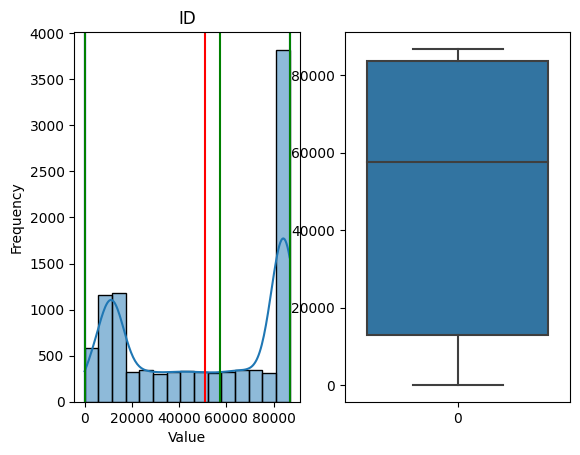

skew = 4.302502486751928
kusrtosis = 36.093998760157326
mean = 77.99089500193723
medain = 60.0
mode = 60
standard deviation = 76.57976396143789
variance = 5864.460248389542
coeff_of_variationUnit of Measure (Per Pack) 98.19064643319673
count of missingUnit of Measure (Per Pack) 0
% of missingUnit of Measure (Per Pack) 0.0


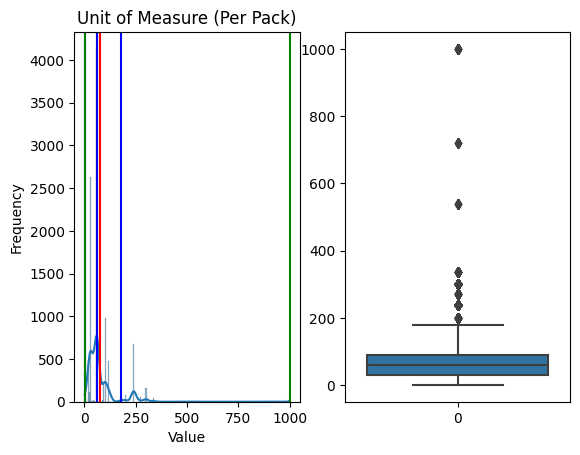

skew = 5.038314698810931
kusrtosis = 40.05030010224185
mean = 18332.534870205345
medain = 3000.0
mode = 10000
standard deviation = 40035.302961494825
variance = 1602825483.218676
coeff_of_variationLine Item Quantity 218.3838909618634
count of missingLine Item Quantity 0
% of missingLine Item Quantity 0.0


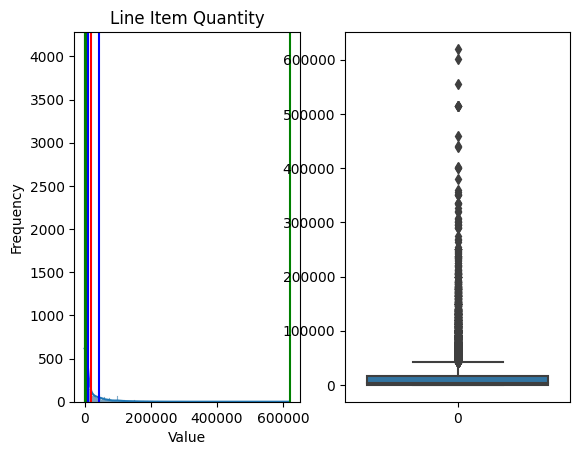

skew = 5.837020186238965
kusrtosis = 54.15243042473459
mean = 157650.56734695853
medain = 30471.465
mode = 200000.0
standard deviation = 345292.06697883835
variance = 119226611518.5186
coeff_of_variationLine Item Value 219.02367545491734
count of missingLine Item Value 0
% of missingLine Item Value 0.0


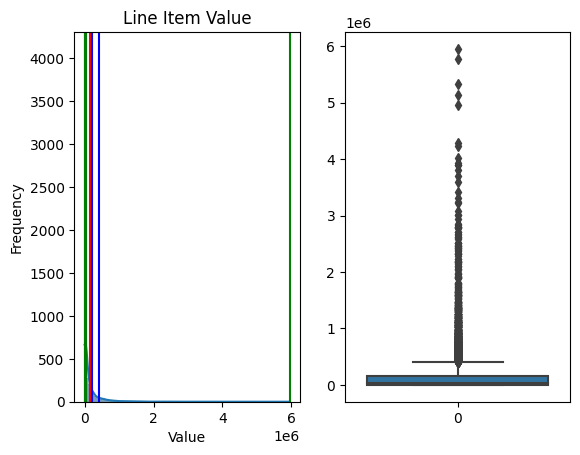

skew = 12.988432142155938
kusrtosis = 293.17620441898987
mean = 21.91024118558698
medain = 9.3
mode = 32.0
standard deviation = 45.60922308447009
variance = 2080.2012303689594
coeff_of_variationPack Price 208.16394807407596
count of missingPack Price 0
% of missingPack Price 0.0


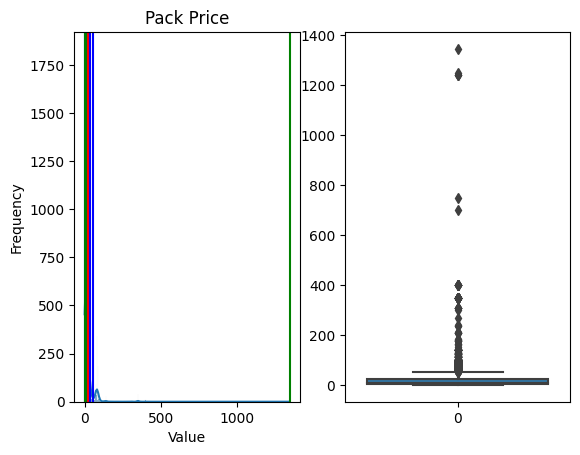

skew = 40.58484939302814
kusrtosis = 2725.9602521753177
mean = 0.6117008911274698
medain = 0.16
mode = 0.04
standard deviation = 3.2758077408433834
variance = 10.73091635496943
coeff_of_variationUnit Price 535.5244349579917
count of missingUnit Price 0
% of missingUnit Price 0.0


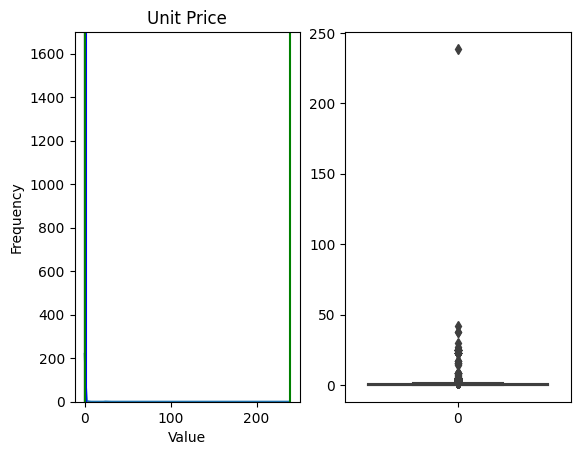

skew = 35.15864921495379
kusrtosis = 2228.4108993955556
mean = 4513.335880474452
medain = 2093.0
mode = 4513.335880474453
standard deviation = 12376.264639658724
variance = 153171926.4308669
coeff_of_variationWeight (Kilograms) 274.2154576441074
count of missingWeight (Kilograms) 0
% of missingWeight (Kilograms) 0.0


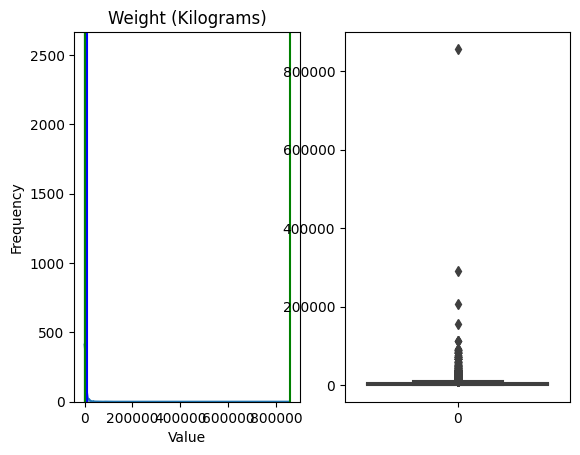


KeyboardInterrupt



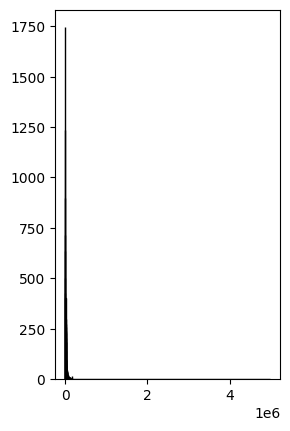

In [118]:
for i in numeric_df.columns:
    plt.subplot(1,2,1)
    mn = min(numeric_df[i])
    mx = max(numeric_df[i])
    q1 = numeric_df[i].quantile(0.25)
    q2 = numeric_df[i].quantile(0.5)
    q3 = numeric_df[i].quantile(0.75)
    iqr = q3 - q1
    uwf = q3 + (1.5 * iqr) if mx > q3 + (1.5 * iqr) else mx
    lwf = q1 - (1.5 * iqr) if mn < q1 - (1.5 * iqr) else mn
    sns.histplot(numeric_df[i],kde = True)
    plt.axvline(numeric_df[i].mean(),color = 'r')
    plt.axvline(numeric_df[i].median(),color = 'g')
    plt.axvline(numeric_df[i].mode()[0],color = 'b')
    plt.axvline(uwf,color = 'b')
    plt.axvline(lwf,color = 'b')
    plt.axvline(mn,color = 'g')
    plt.axvline(mx,color = 'g')
    plt.title(i)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    print(f'skew = {numeric_df[i].skew()}')
    print(f'kusrtosis = {numeric_df[i].kurt()}')
    print(f'mean = {numeric_df[i].mean()}')
    print(f'medain = {numeric_df[i].median()}')
    print(f'mode = {numeric_df[i].mode()[0]}')
    print(f'standard deviation = {numeric_df[i].std()}')
    print(f'variance = {numeric_df[i].var()}')
    plt.subplot(1,2,2)
    sns.boxplot(numeric_df[i])
    print('coeff_of_variation'+i,(numeric_df[i].std()/abs(numeric_df[i].mean())*100))
    print('count of missing'+i,numeric_df[i].isnull().sum())
    print('% of missing'+i,round(numeric_df[i].isnull().sum()/numeric_df[i].isnull().shape[0]*100,3))
    plt.show()

In [197]:
li=['Country']
li1=[]
for i in li:
    cat=df[i].unique()
    d={}
    for j in range(len(cat)):
        d[j]=df[df[i]==cat[j]]['Freight Cost (USD)']
    li1.append([i,stats.f_oneway(*d.values()).pvalue])

ji=pd.DataFrame(li1)
v=ji[ji[1]<0.05][0].values
cat_df=df[v]
cat_df

,Country
0,Côte d'Ivoire
1,Vietnam
2,Côte d'Ivoire
3,Vietnam
4,Vietnam
...,...
10319,Zimbabwe
10320,Côte d'Ivoire
10321,Zambia
10322,Zimbabwe


In [198]:
dfc = pd.concat([numeric_df.drop(columns='ID'),p],axis=1)
dfc.head()

,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD),Country
0,30,19,551.0,29.00,0.97,13.0,780.34,0.0,Côte d'Ivoire
1,240,1000,6200.0,6.20,0.03,358.0,4521.50,0.0,Vietnam
2,100,500,40000.0,80.00,0.80,171.0,1653.78,0.0,Côte d'Ivoire
3,60,31920,127360.8,3.99,0.07,1855.0,16007.06,0.0,Vietnam
4,60,38000,121600.0,3.20,0.05,7590.0,45450.08,0.0,Vietnam


<module 'pandas' from 'C:\\Users\\Krishna\\anaconda3\\lib\\site-packages\\pandas\\__init__.py'>

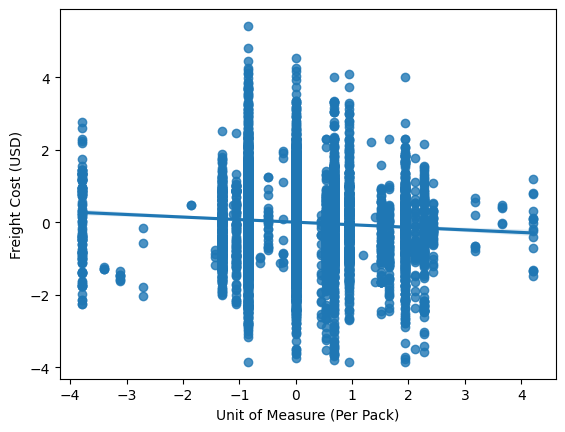

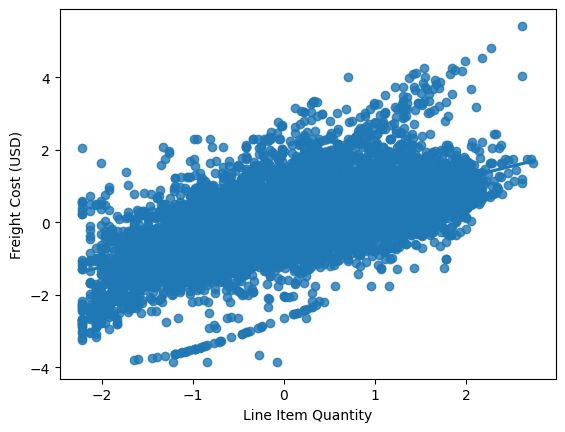

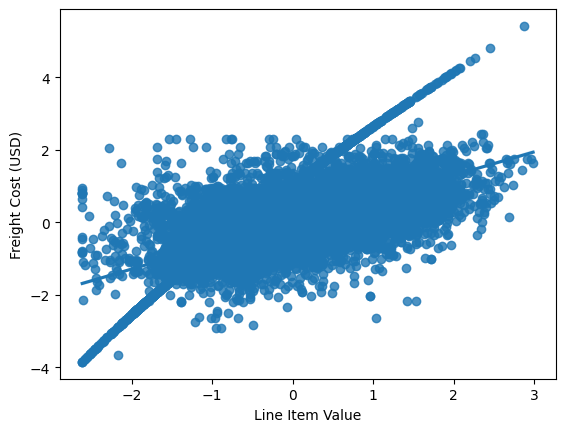

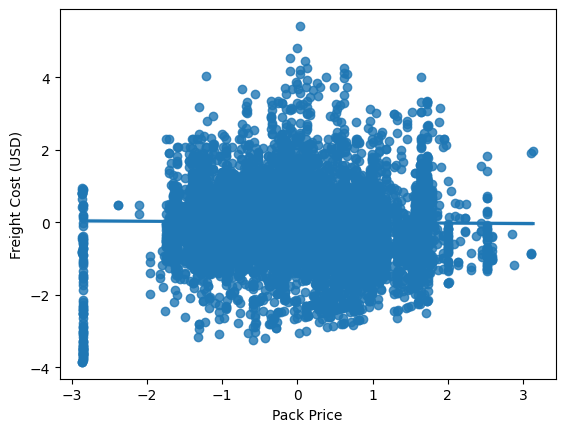

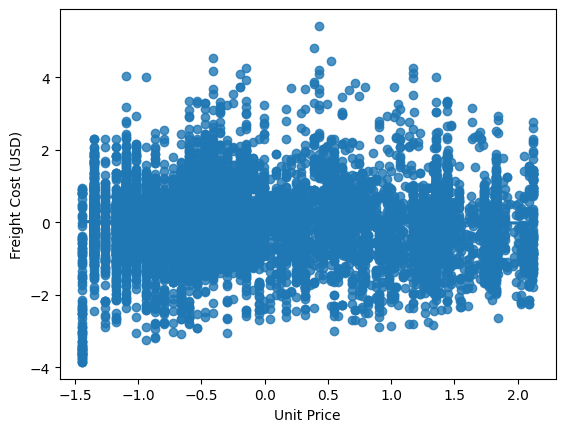

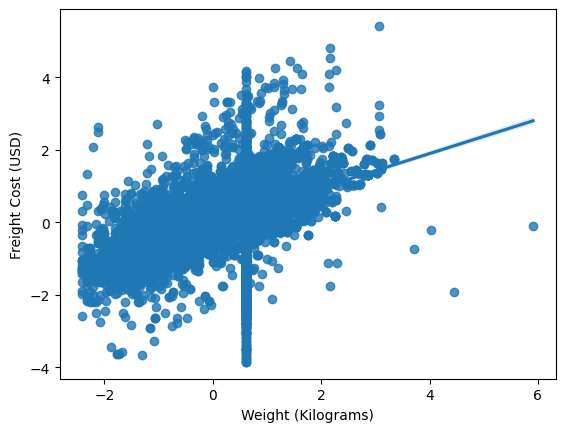

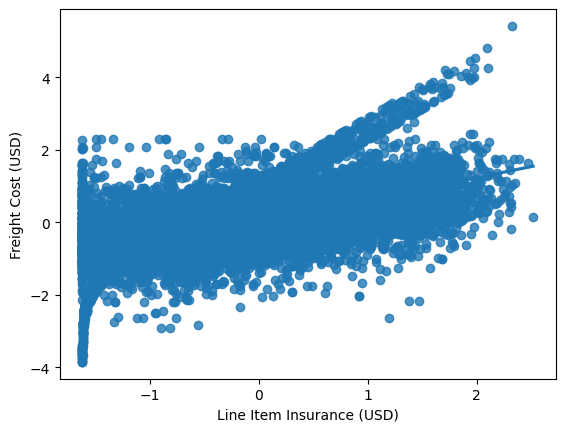

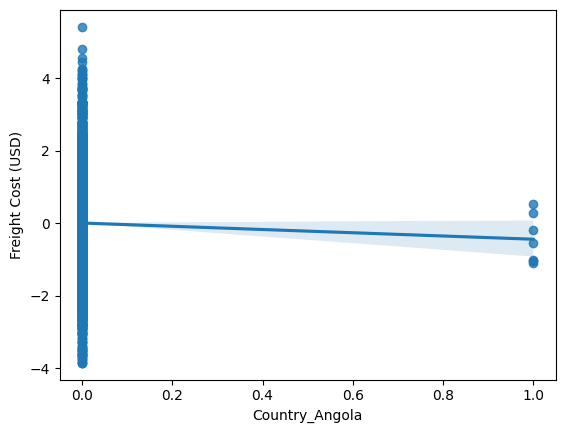

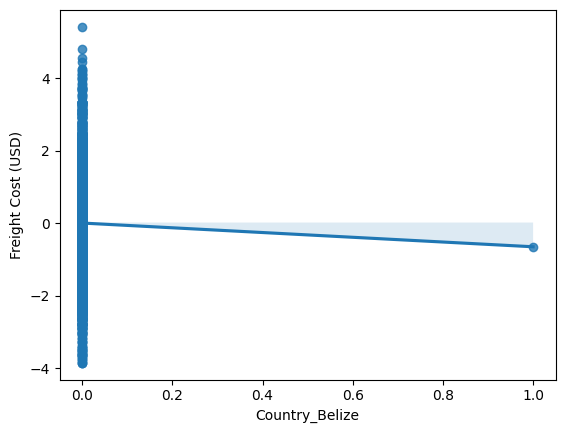

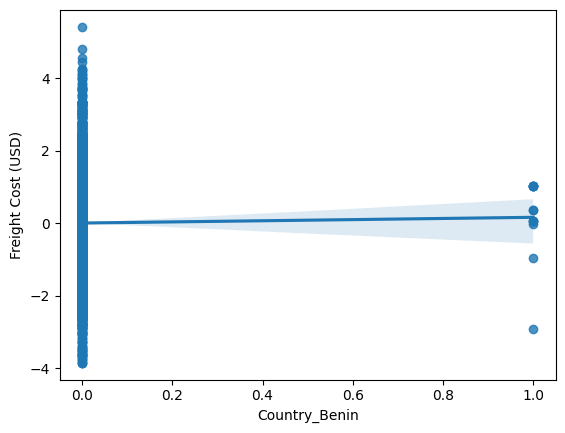

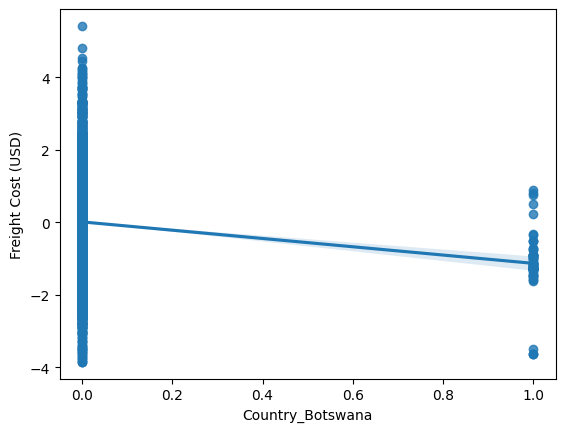

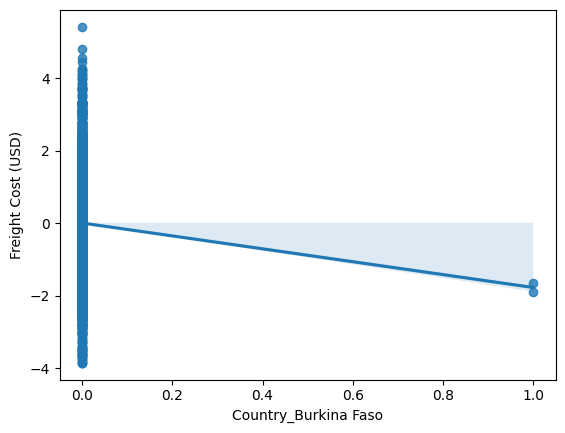

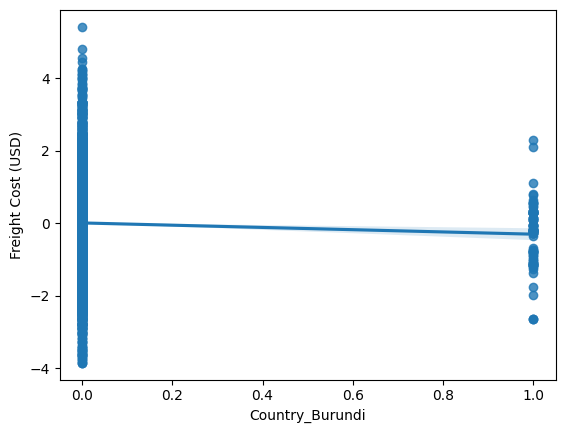

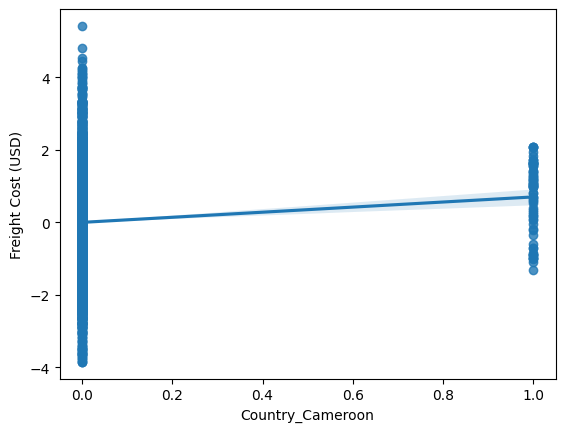

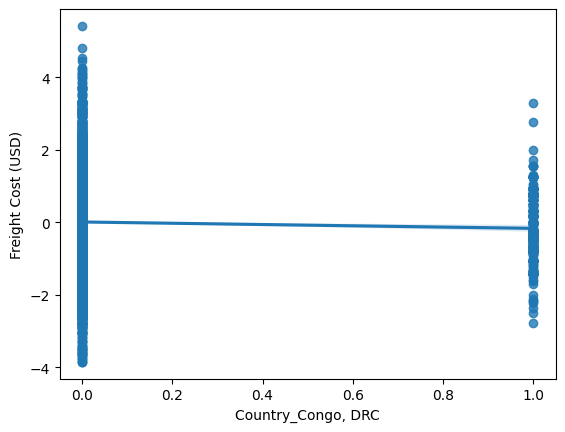

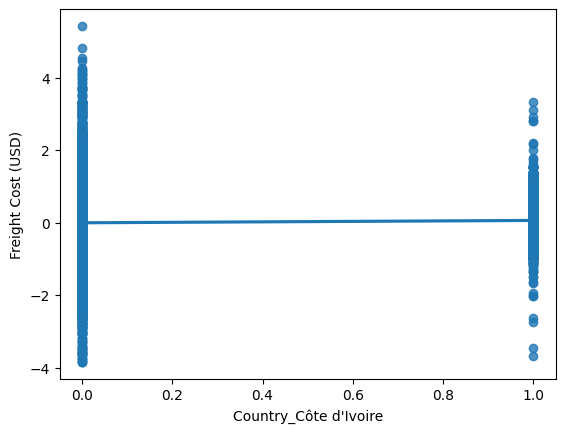

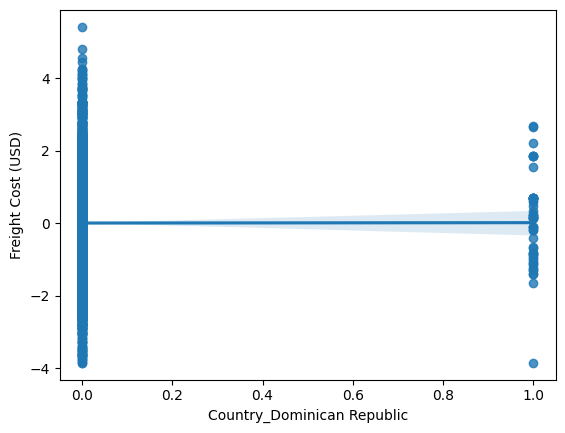

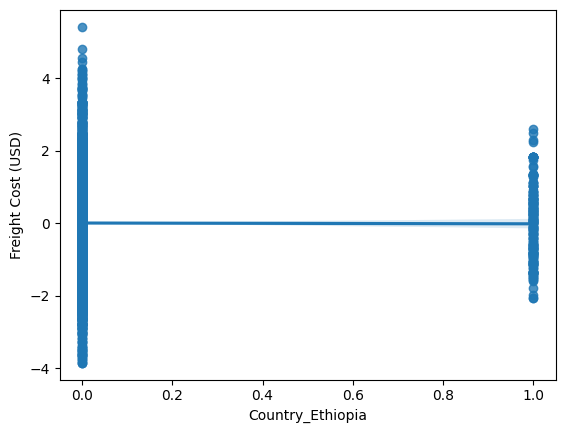

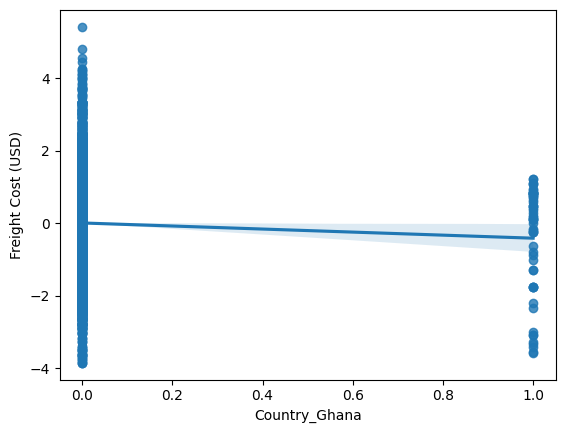

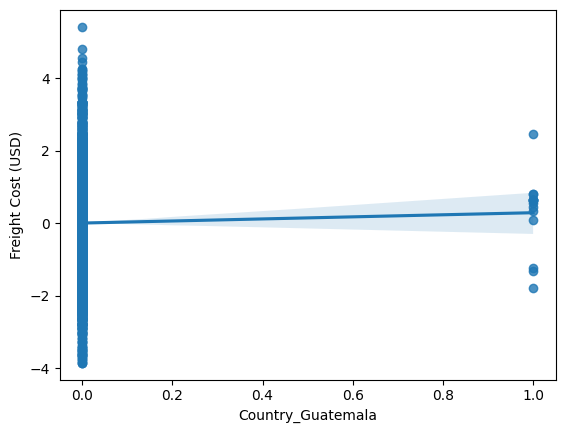

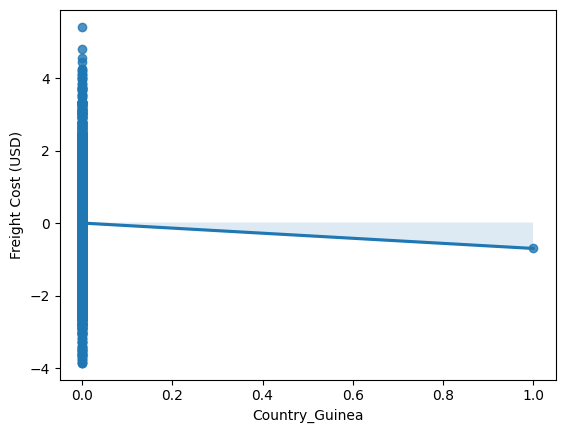

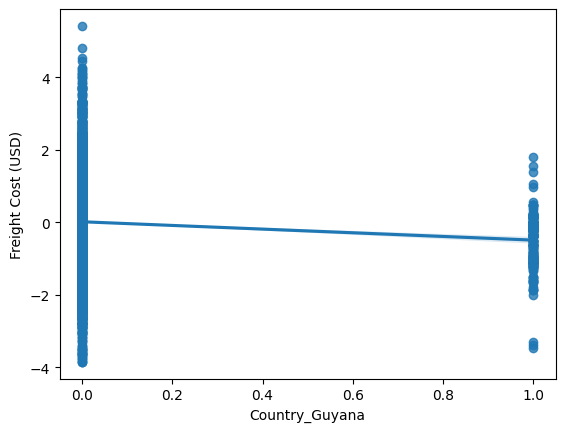

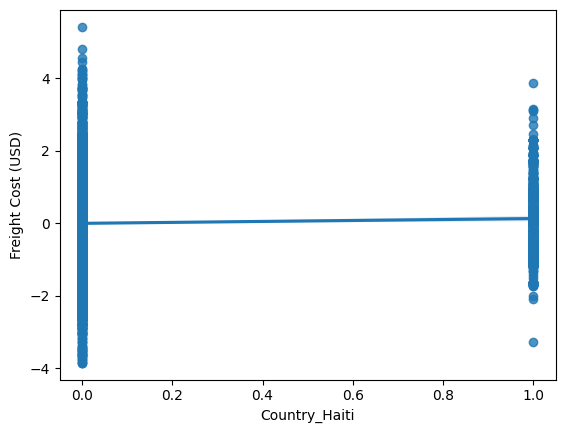

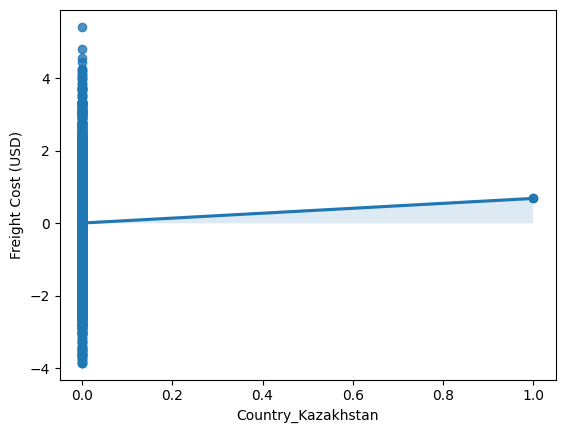

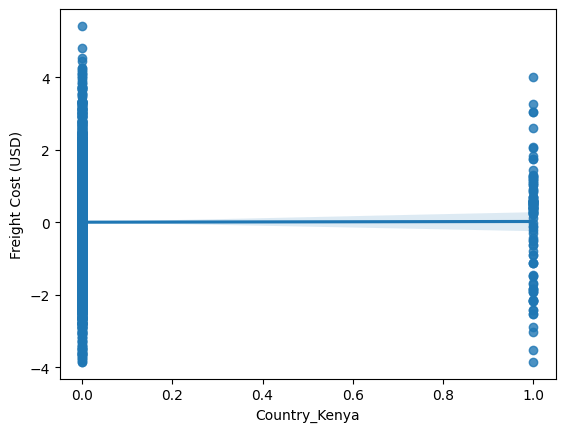

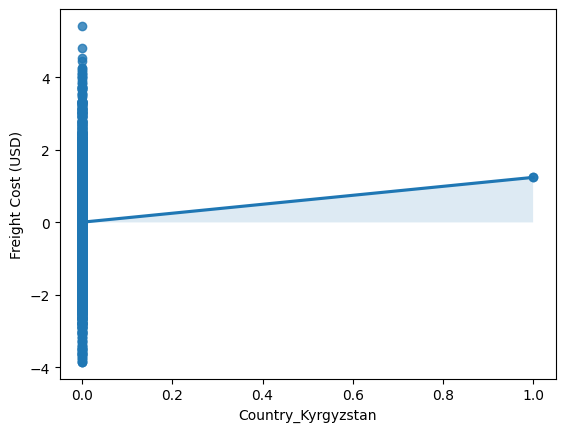

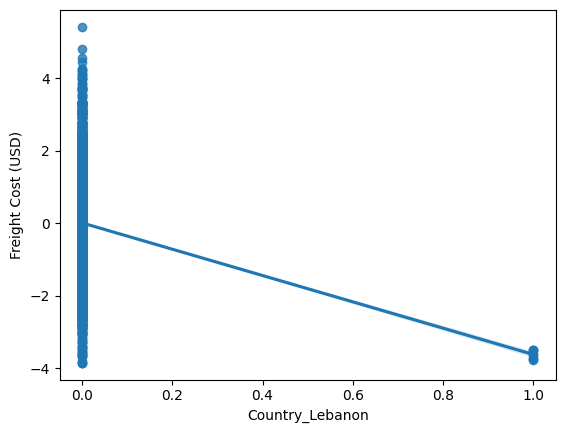

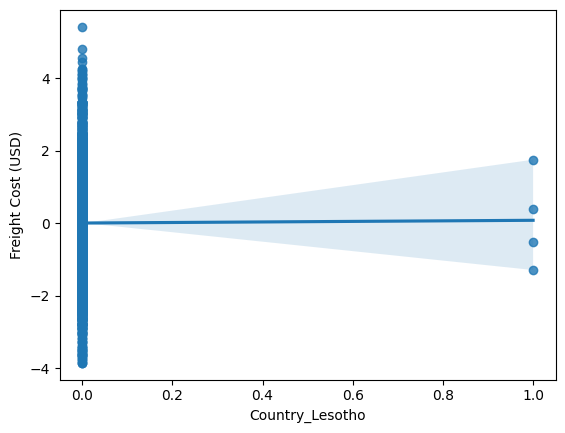

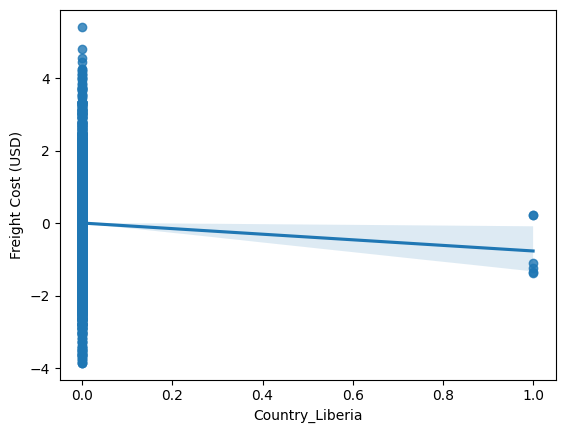

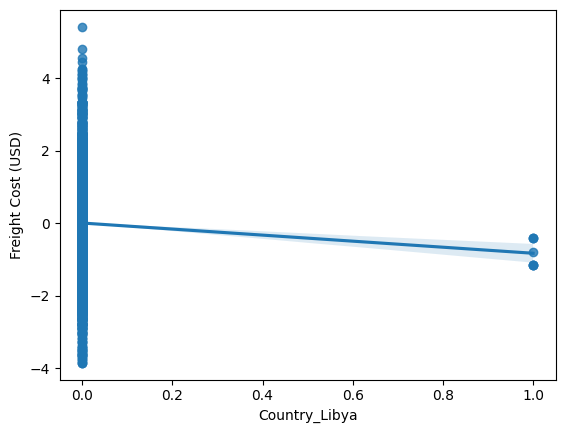

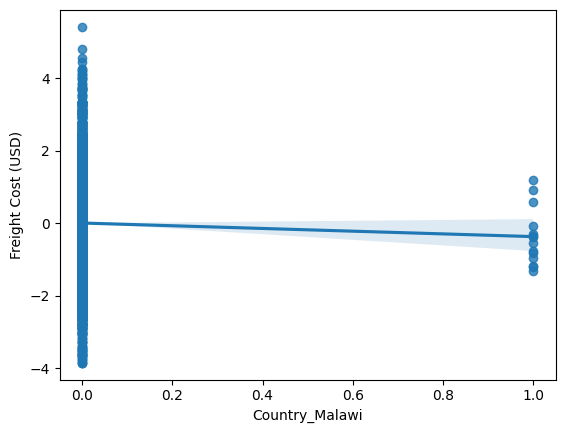

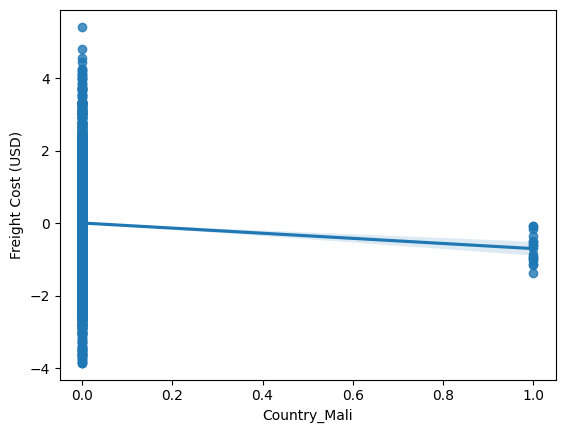

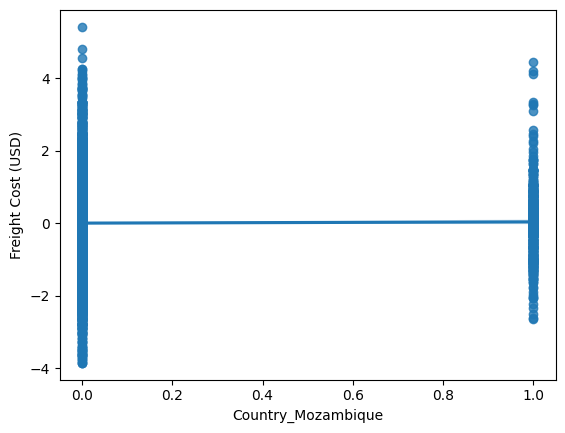

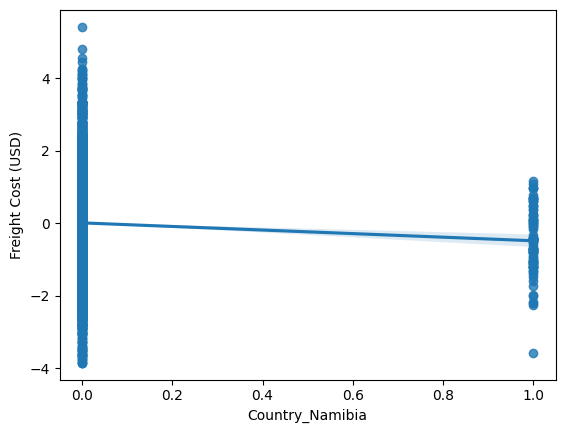

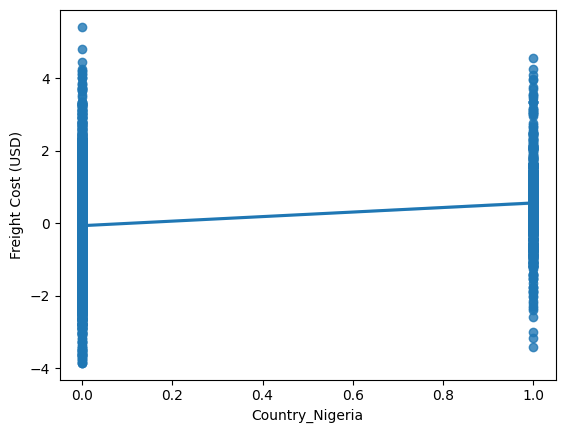

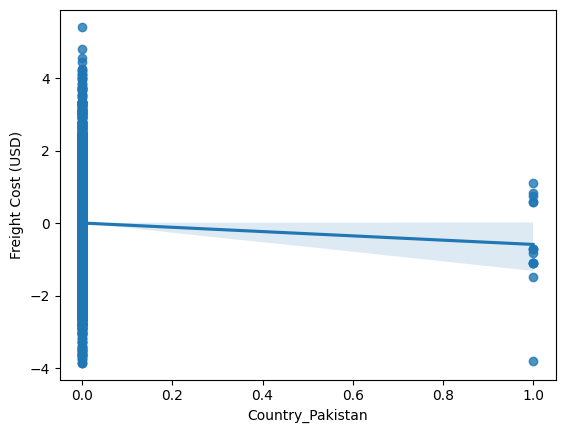

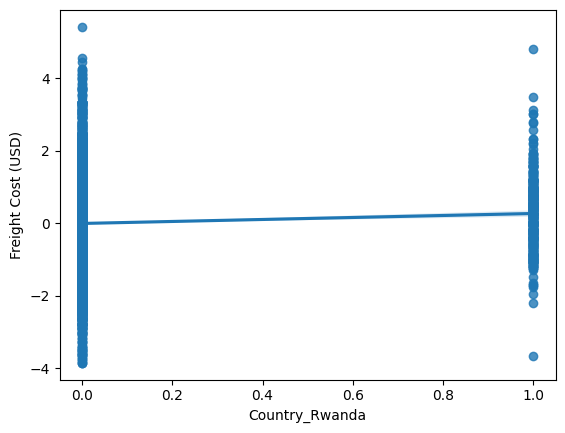

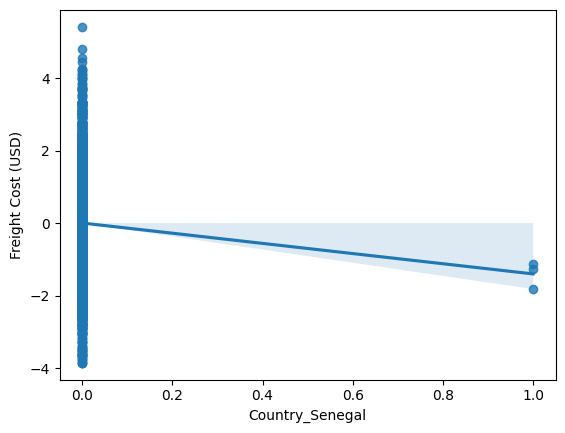

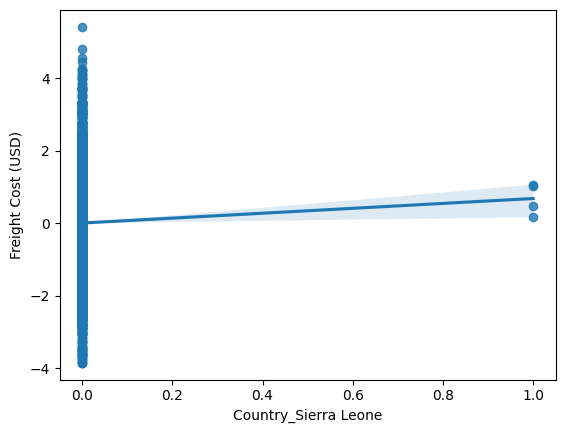

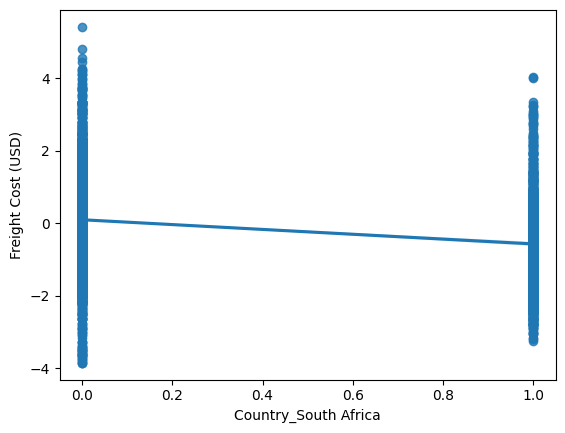

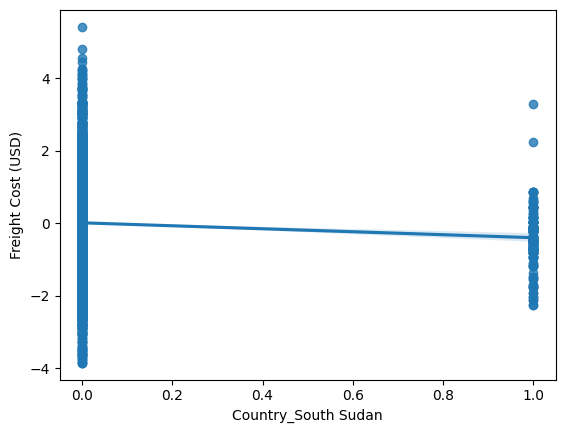

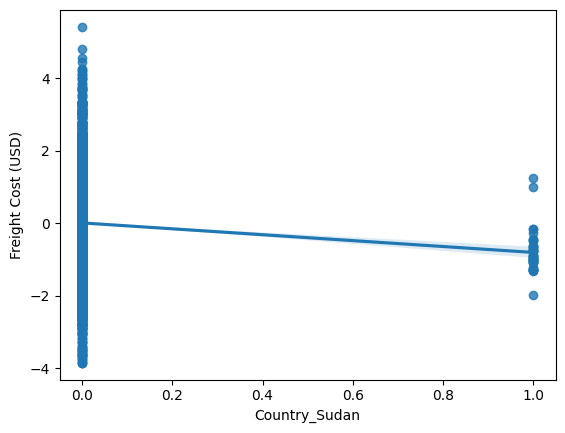

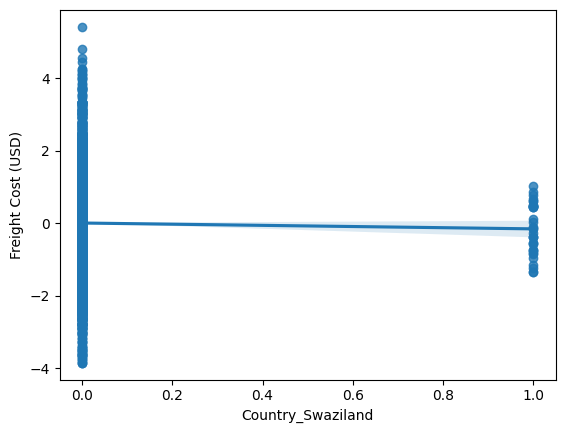

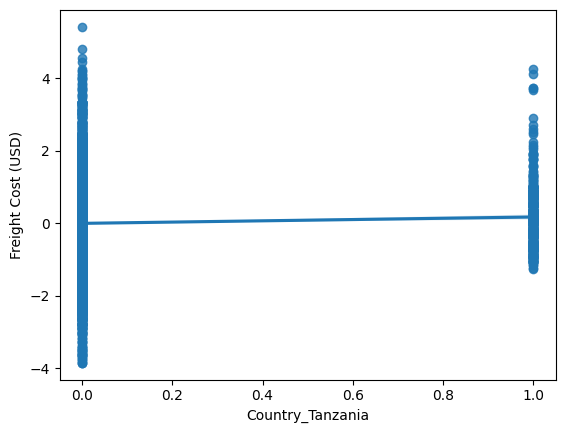

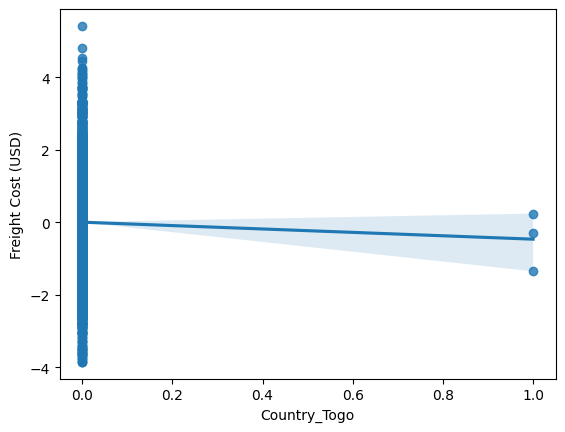

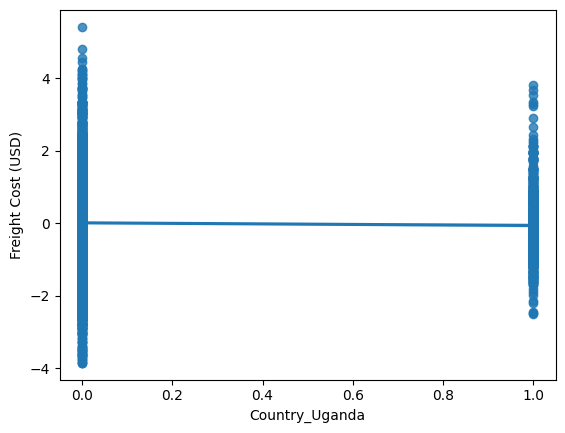

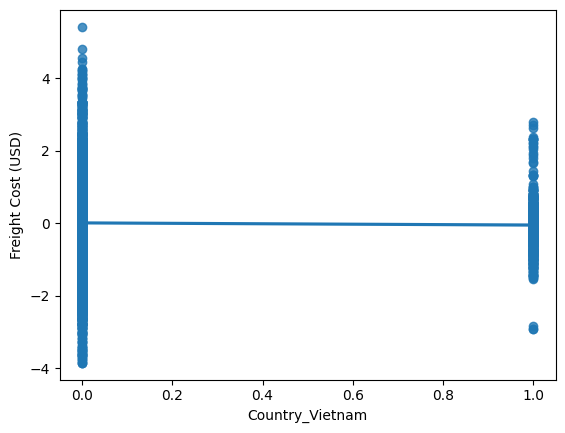

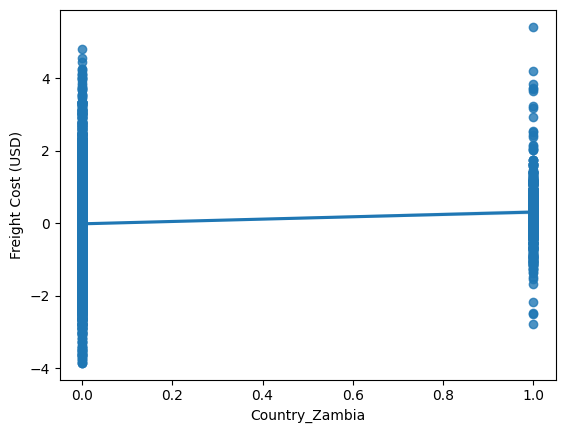

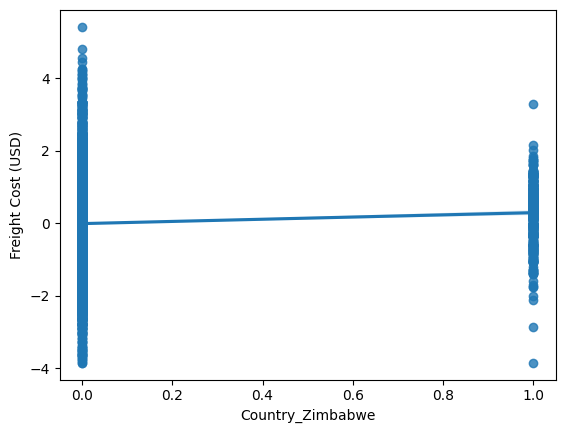

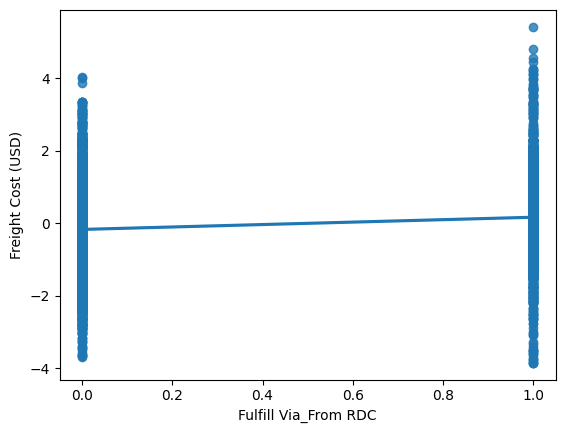

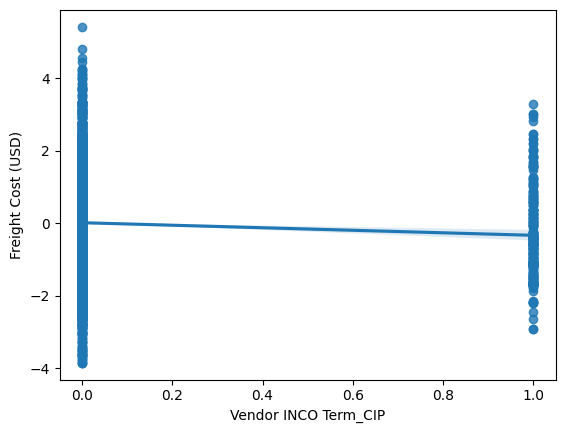

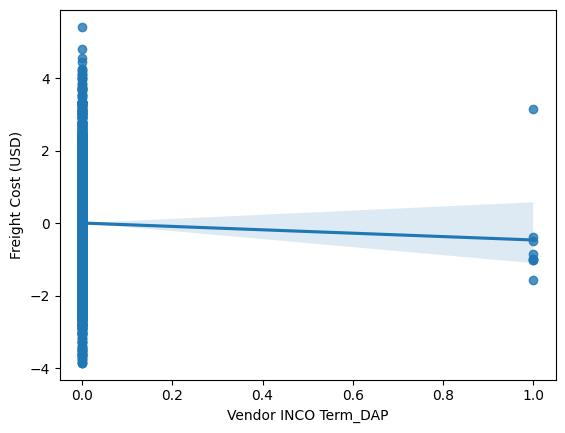

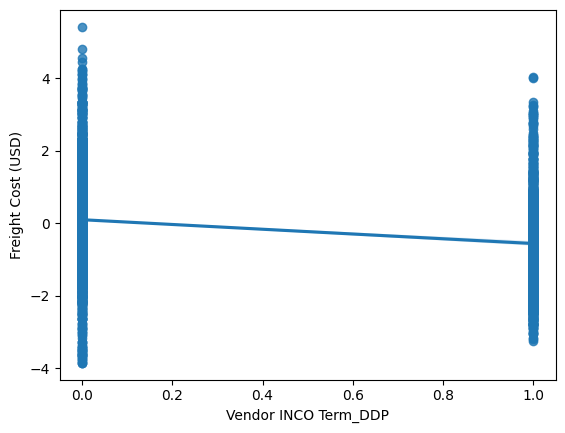

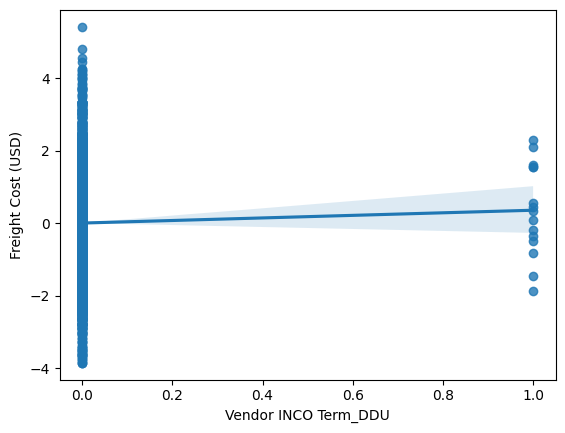

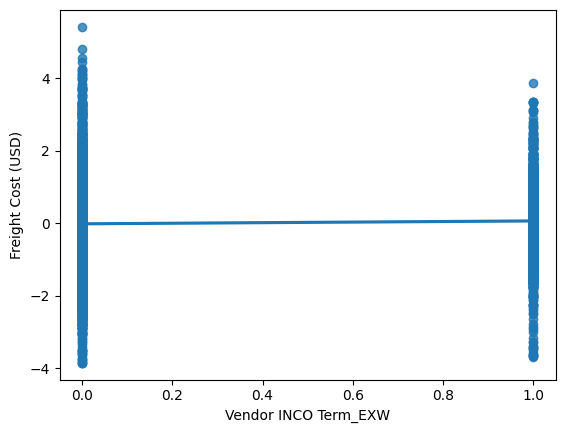

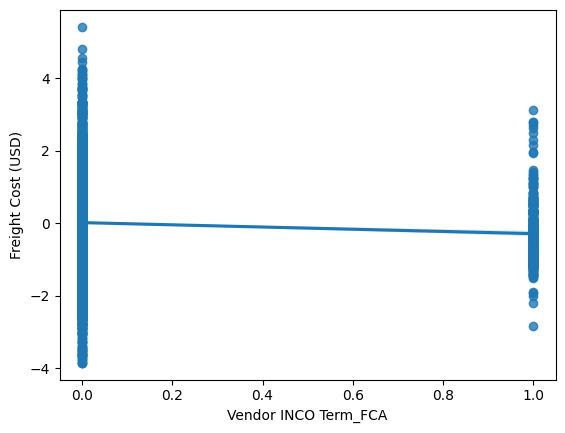

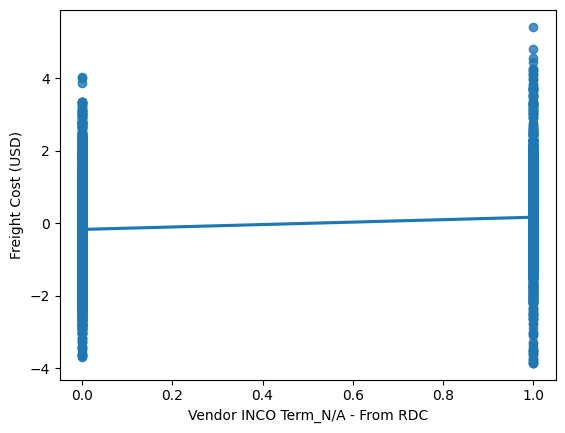

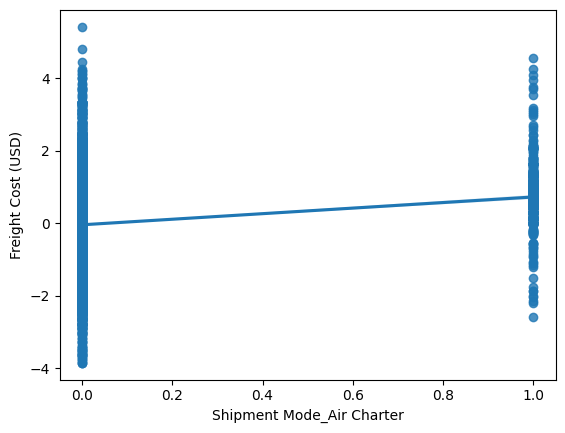

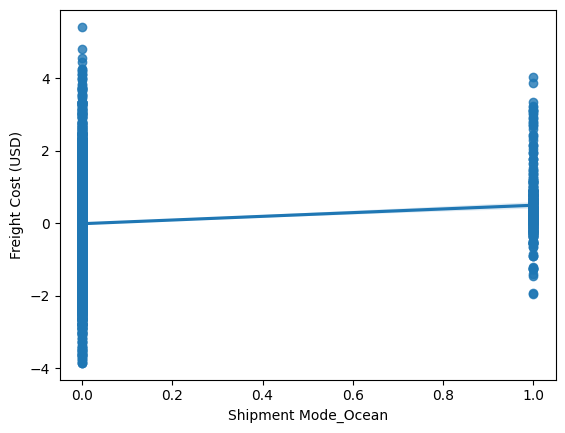

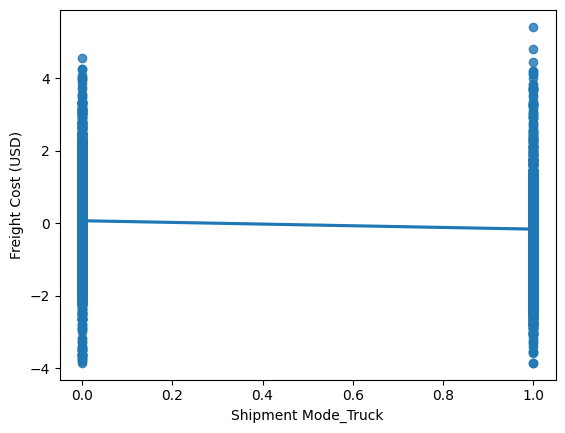

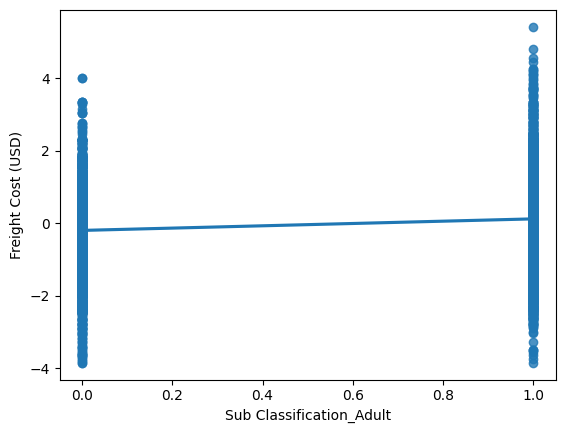

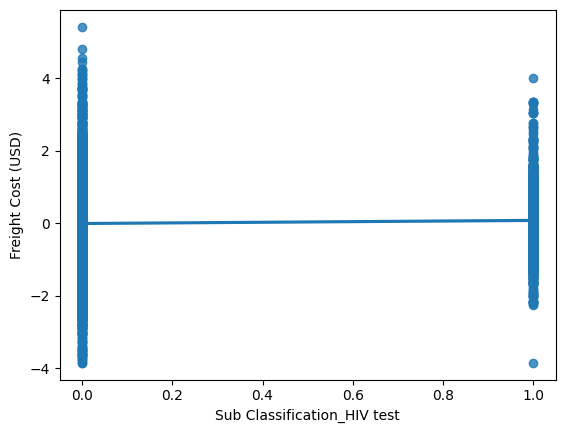

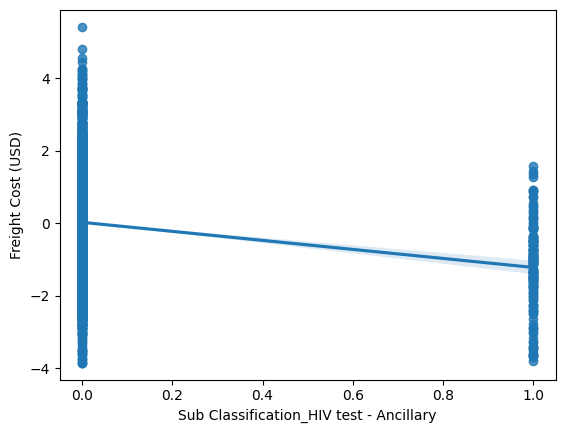

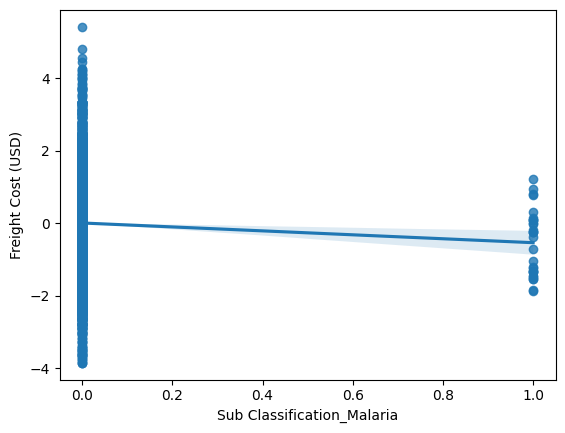

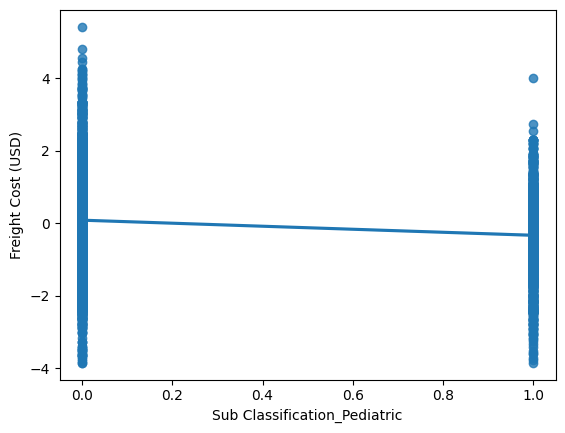

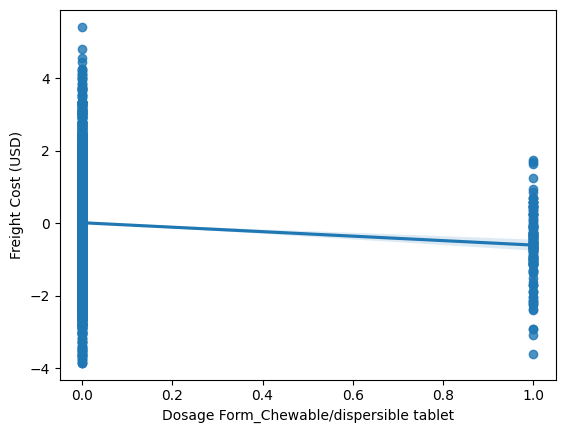

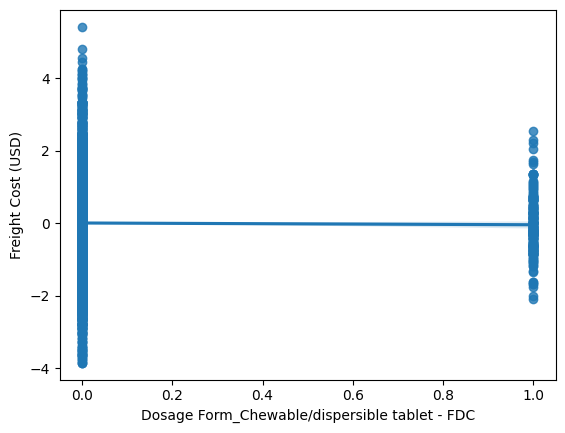

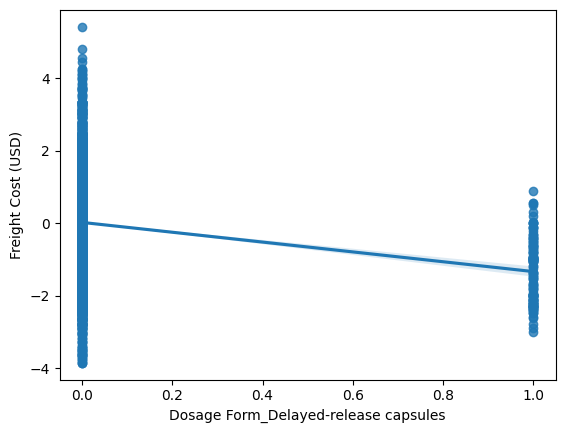

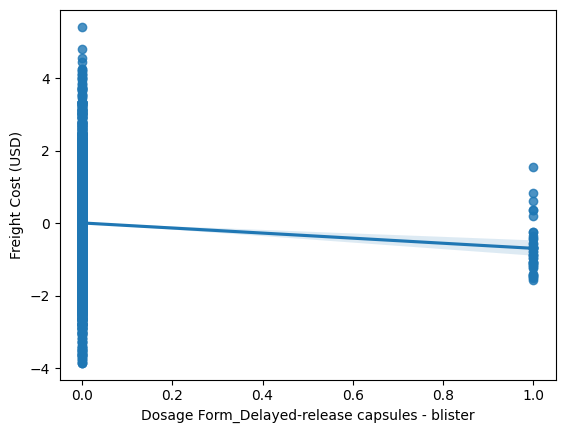

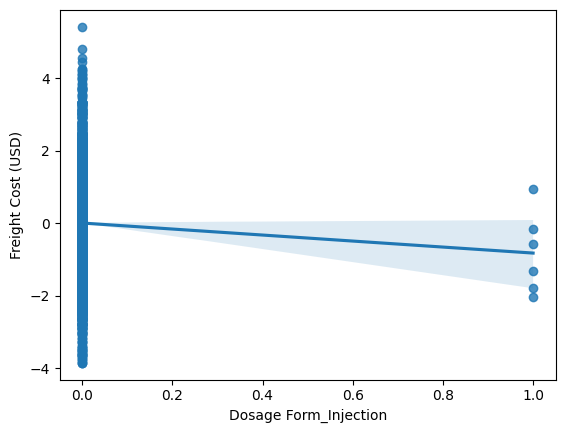

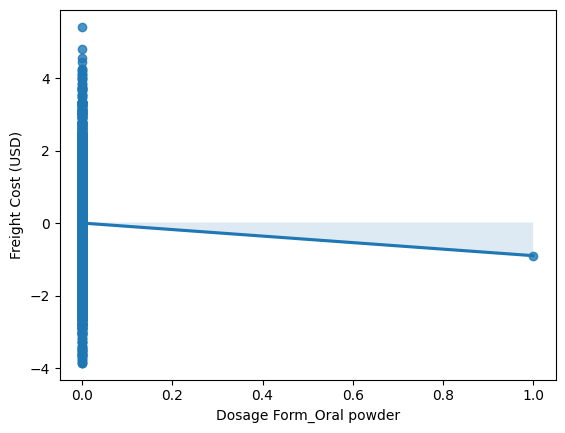

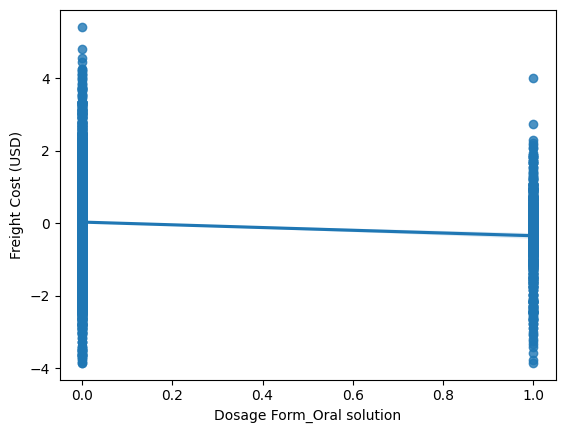

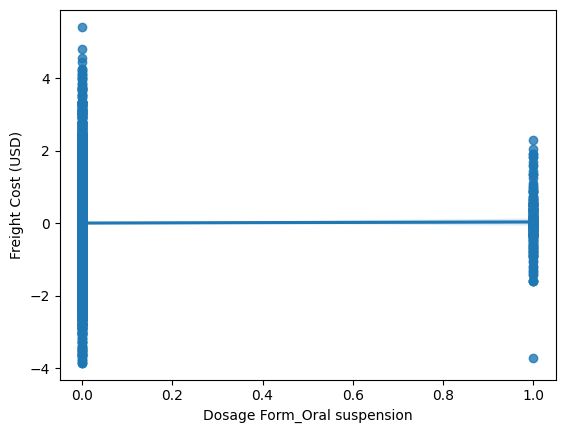

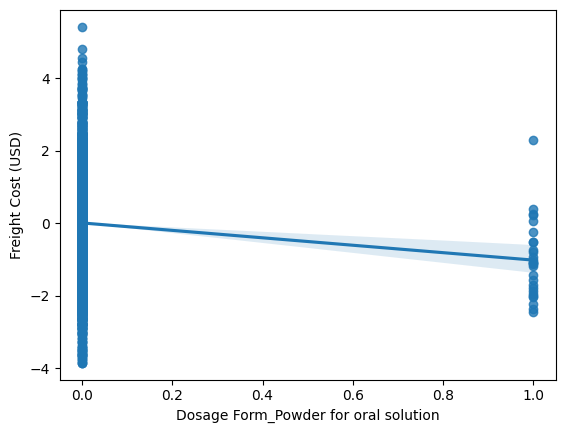

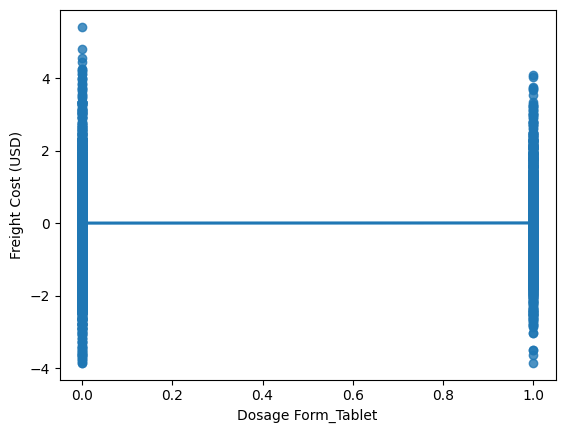

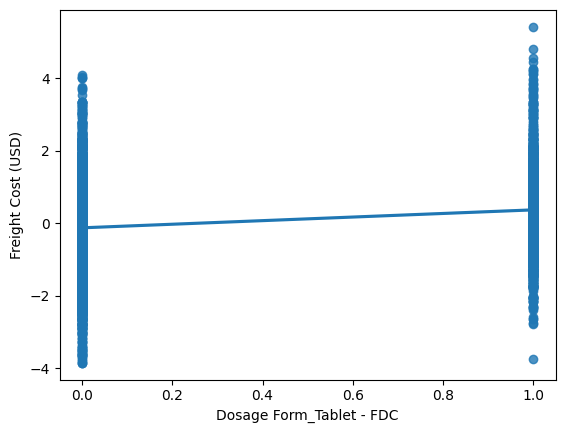

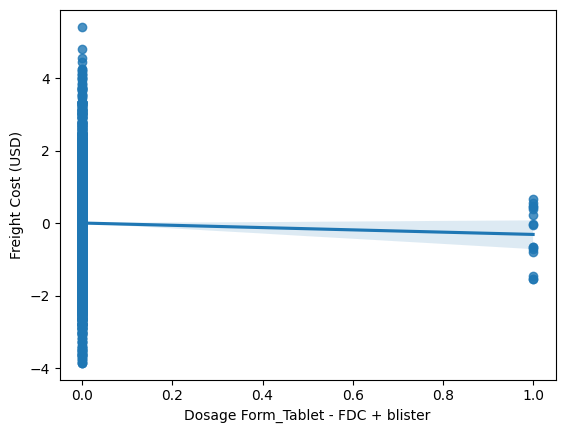

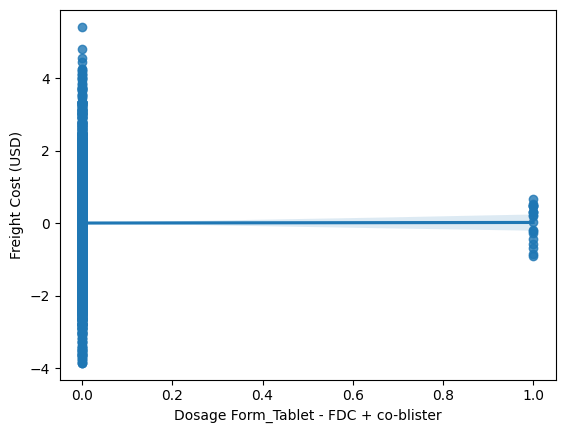

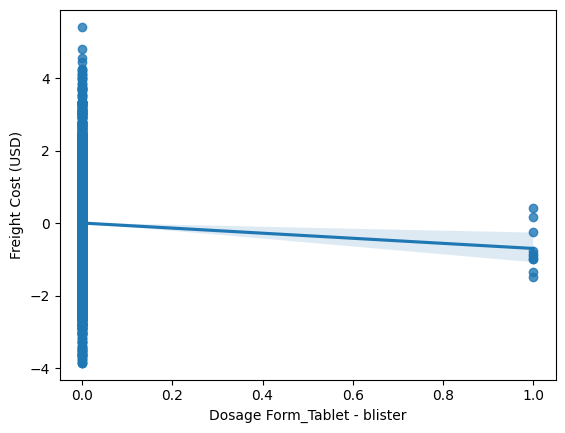

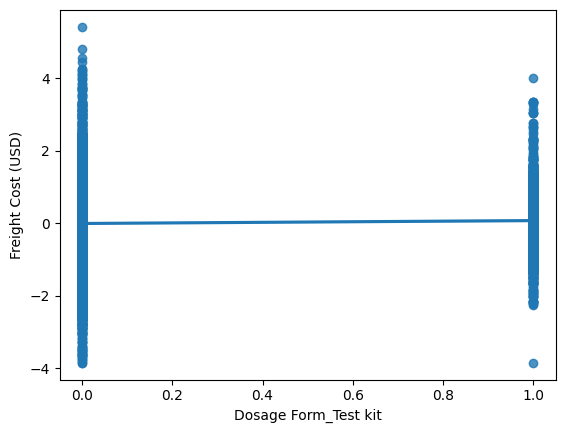

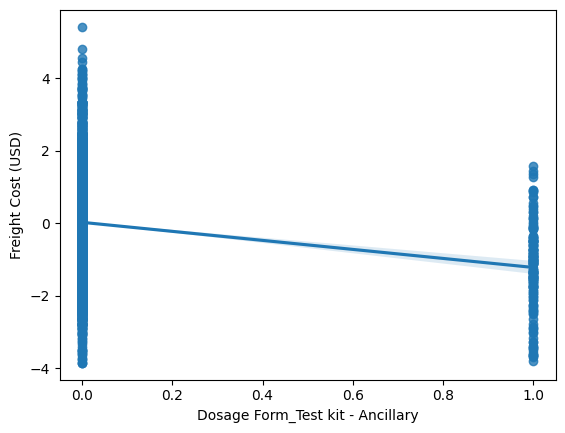

In [24]:
for i in dfc.drop(columns='Freight Cost (USD)').select_dtypes('number').columns:
    sns.regplot(x=dfc[i],y=dfc['Freight Cost (USD)'])
    plt.show()

In [25]:
#sns.pairplot(dfc)

## Outlier Treatment

In [158]:
def get_q_values(series):
    mn = min(series)
    mx = max(series)
    q1 = series.quantile(0.25)
    q2 = series.quantile(0.5)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    uwf = q3 + (1.5 * iqr) if mx > q3 + (1.5 * iqr) else mx
    lwf = q3 - (1.5 * iqr) if mn < q3 - (1.5 * iqr) else mn

    return mn,mx,q1,q2,q3,iqr,uwf,lwf
mn,mx,q1,q2,q3,iqr,uwf,lwf = get_q_values(dfc['Freight Cost (USD)'])

In [159]:

dfc['Is_Outlier'] = ((dfc['Freight Cost (USD)'] < lwf) | (dfc['Freight Cost (USD)'] > uwf)).astype(int)
# Function to determine if a value is an outlier
def is_outlier(x):
    return 0 if (x < lwf or x > uwf) else 1



In [160]:
# Create the 'isoutlier' column based on the outlier condition
dfc['isoutlier'] = dfc['Freight Cost (USD)'].apply(is_outlier)

In [161]:
dfc['isoutlier'].value_counts()

1    9369
0     955
Name: isoutlier, dtype: int64

In [162]:
final_dfc = (dfc[dfc['isoutlier'] == 1])
final_dfc.shape

(9369, 84)

In [163]:
y = final_dfc['Freight Cost (USD)']
x = final_dfc.drop(columns='Freight Cost (USD)')

In [164]:
dfc

,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD),Country_Angola,Country_Belize,Country_Benin,Country_Botswana,Country_Burkina Faso,Country_Burundi,Country_Cameroon,"Country_Congo, DRC",Country_Côte d'Ivoire,Country_Dominican Republic,Country_Ethiopia,Country_Ghana,Country_Guatemala,Country_Guinea,Country_Guyana,Country_Haiti,Country_Kazakhstan,Country_Kenya,Country_Kyrgyzstan,Country_Lebanon,Country_Lesotho,Country_Liberia,Country_Libya,Country_Malawi,Country_Mali,Country_Mozambique,Country_Namibia,Country_Nigeria,Country_Pakistan,Country_Rwanda,Country_Senegal,Country_Sierra Leone,Country_South Africa,Country_South Sudan,Country_Sudan,Country_Swaziland,Country_Tanzania,Country_Togo,Country_Uganda,Country_Vietnam,Country_Zambia,Country_Zimbabwe,Fulfill Via_From RDC,Vendor INCO Term_CIP,Vendor INCO Term_DAP,Vendor INCO Term_DDP,Vendor INCO Term_DDU,Vendor INCO Term_EXW,Vendor INCO Term_FCA,Vendor INCO Term_N/A - From RDC,Shipment Mode_Air Charter,Shipment Mode_Ocean,Shipment Mode_Truck,Sub Classification_Adult,Sub Classification_HIV test,Sub Classification_HIV test - Ancillary,Sub Classification_Malaria,Sub Classification_Pediatric,Dosage Form_Chewable/dispersible tablet,Dosage Form_Chewable/dispersible tablet - FDC,Dosage Form_Delayed-release capsules,Dosage Form_Delayed-release capsules - blister,Dosage Form_Injection,Dosage Form_Oral powder,Dosage Form_Oral solution,Dosage Form_Oral suspension,Dosage Form_Powder for oral solution,Dosage Form_Tablet,Dosage Form_Tablet - FDC,Dosage Form_Tablet - FDC + blister,Dosage Form_Tablet - FDC + co-blister,Dosage Form_Tablet - blister,Dosage Form_Test kit,Dosage Form_Test kit - Ancillary,Is_Outlier,isoutlier
0,-0.843150,-1.654936,-1.369300,0.916493,1.512786,-1.942205,780.34,-1.623112,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,1.931421,-0.421703,-0.616172,-0.394556,-1.178592,-0.779695,4521.50,-1.623112,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,0.687094,-0.670369,0.114640,1.649407,1.351168,-1.095141,1653.78,-1.623112,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0.012292,1.064442,0.648694,-0.789346,-0.866802,0.064303,16007.06,-1.623112,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,0.012292,1.151329,0.626042,-0.984119,-1.017348,0.974018,45450.08,-1.623112,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,0.012292,1.941253,1.476193,-0.880560,-0.940796,1.939425,46111.55,1.338023,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
10320,0.012292,0.862545,0.686033,-0.349437,-0.594332,0.602803,14734.92,0.639842,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
10321,-0.843150,2.613670,2.879165,0.029618,0.425988,3.063374,5140114.74,2.329400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
10322,0.012292,0.773559,0.594101,-0.3494

In [ ]:
model = OLS(y,x).fit()
print(model.summary())

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [ ]:
vif_df = pd.DataFrame()
vif_df['vif'] = [vif(x.values,i) for i in range(len(x.columns))]
vif_df['attributes'] = x.columns
vif_df

In [ ]:
vif_df[vif_df['vif']<10]

In [ ]:
li=vif_df[vif_df['vif']<10]['attributes'].values

In [ ]:
y = final_dfc['Freight Cost (USD)']
x_c = sm.add_constant(final_dfc[li])

In [ ]:
model2 = OLS(y,x_c).fit()
print(model2.summary())

In [39]:
from sklearn.svm import SVR
svr_poly = SVR(kernel="poly", C=120, gamma="auto", degree=9, epsilon=0.5, coef0=1)
svr_poly.fit(x,y=y)

SVR(C=120, coef0=1, degree=9, epsilon=0.5, gamma='auto', kernel='poly')

In [40]:
ypred=svr_poly.predict(x)

In [41]:
sum(abs(y-ypred))/len(y)

0.29465611172978

In [42]:
a=list(x.iloc[1].values)
a

[1.931421371446868,
 -0.4217034168349901,
 -0.6161717501161669,
 -0.3945563879793537,
 -1.17859245323621,
 -0.7796946437476556,
 -1.623112352623837,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0]

In [43]:
svr_poly.score(X=x,y=y)

0.766135105810402

In [44]:
i=30
y[i],svr_poly.predict(x[i]),x.iloc[i]

KeyError: 30

In [ ]:
model2.summary()

In [125]:
dfc.sample(5)

,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD),Country_Angola,Country_Belize,Country_Benin,Country_Botswana,Country_Burkina Faso,Country_Burundi,Country_Cameroon,"Country_Congo, DRC",Country_Côte d'Ivoire,Country_Dominican Republic,Country_Ethiopia,Country_Ghana,Country_Guatemala,Country_Guinea,Country_Guyana,Country_Haiti,Country_Kazakhstan,Country_Kenya,Country_Kyrgyzstan,Country_Lebanon,Country_Lesotho,Country_Liberia,Country_Libya,Country_Malawi,Country_Mali,Country_Mozambique,Country_Namibia,Country_Nigeria,Country_Pakistan,Country_Rwanda,Country_Senegal,Country_Sierra Leone,Country_South Africa,Country_South Sudan,Country_Sudan,Country_Swaziland,Country_Tanzania,Country_Togo,Country_Uganda,Country_Vietnam,Country_Zambia,Country_Zimbabwe,Fulfill Via_From RDC,Vendor INCO Term_CIP,Vendor INCO Term_DAP,Vendor INCO Term_DDP,Vendor INCO Term_DDU,Vendor INCO Term_EXW,Vendor INCO Term_FCA,Vendor INCO Term_N/A - From RDC,Shipment Mode_Air Charter,Shipment Mode_Ocean,Shipment Mode_Truck,Sub Classification_Adult,Sub Classification_HIV test,Sub Classification_HIV test - Ancillary,Sub Classification_Malaria,Sub Classification_Pediatric,Dosage Form_Chewable/dispersible tablet,Dosage Form_Chewable/dispersible tablet - FDC,Dosage Form_Delayed-release capsules,Dosage Form_Delayed-release capsules - blister,Dosage Form_Injection,Dosage Form_Oral powder,Dosage Form_Oral solution,Dosage Form_Oral suspension,Dosage Form_Powder for oral solution,Dosage Form_Tablet,Dosage Form_Tablet - FDC,Dosage Form_Tablet - FDC + blister,Dosage Form_Tablet - FDC + co-blister,Dosage Form_Tablet - blister,Dosage Form_Test kit,Dosage Form_Test kit - Ancillary,Is_Outlier,isoutlier
4631,-1.310471,-1.012608,-0.644066,0.992638,1.826684,-1.467546,-0.603572,-0.674261,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
10052,0.012292,0.830593,0.219788,-1.170092,-1.096574,-0.229342,-0.187628,0.337219,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4055,0.687094,-0.032369,0.979606,1.719744,1.443239,-0.186359,0.916793,0.992236,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3945,0.012292,1.733893,1.737848,-0.155678,-0.470884,1.510842,1.488225,1.575494,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4781,0.012292,-1.889676,-1.662652,0.798097,0.691974,0.615733,-1.884205,-1.553234,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [191]:
x=dfc.drop(['Freight Cost (USD)'],axis=1)
y=dfc['Freight Cost (USD)']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [192]:
lr = LinearRegression()

In [193]:
lr.fit(x_train,y_train)

ValueError: could not convert string to float: 'Mozambique'

In [ ]:
y_pred = lr.predict(x_test)

In [169]:
r2_score(y_pred,y_test)

-3.232774328705184

In [178]:
dfc

,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD),Country_Angola,Country_Belize,Country_Benin,Country_Botswana,Country_Burkina Faso,Country_Burundi,Country_Cameroon,"Country_Congo, DRC",Country_Côte d'Ivoire,Country_Dominican Republic,Country_Ethiopia,Country_Ghana,Country_Guatemala,Country_Guinea,Country_Guyana,Country_Haiti,Country_Kazakhstan,Country_Kenya,Country_Kyrgyzstan,Country_Lebanon,Country_Lesotho,Country_Liberia,Country_Libya,Country_Malawi,Country_Mali,Country_Mozambique,Country_Namibia,Country_Nigeria,Country_Pakistan,Country_Rwanda,Country_Senegal,Country_Sierra Leone,Country_South Africa,Country_South Sudan,Country_Sudan,Country_Swaziland,Country_Tanzania,Country_Togo,Country_Uganda,Country_Vietnam,Country_Zambia,Country_Zimbabwe,Fulfill Via_From RDC,Vendor INCO Term_CIP,Vendor INCO Term_DAP,Vendor INCO Term_DDP,Vendor INCO Term_DDU,Vendor INCO Term_EXW,Vendor INCO Term_FCA,Vendor INCO Term_N/A - From RDC,Shipment Mode_Air Charter,Shipment Mode_Ocean,Shipment Mode_Truck,Sub Classification_Adult,Sub Classification_HIV test,Sub Classification_HIV test - Ancillary,Sub Classification_Malaria,Sub Classification_Pediatric,Dosage Form_Chewable/dispersible tablet,Dosage Form_Chewable/dispersible tablet - FDC,Dosage Form_Delayed-release capsules,Dosage Form_Delayed-release capsules - blister,Dosage Form_Injection,Dosage Form_Oral powder,Dosage Form_Oral solution,Dosage Form_Oral suspension,Dosage Form_Powder for oral solution,Dosage Form_Tablet,Dosage Form_Tablet - FDC,Dosage Form_Tablet - FDC + blister,Dosage Form_Tablet - FDC + co-blister,Dosage Form_Tablet - blister,Dosage Form_Test kit,Dosage Form_Test kit - Ancillary,Is_Outlier,isoutlier
0,-0.843150,-1.654936,-1.369300,0.916493,1.512786,-1.942205,780.34,-1.623112,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,1.931421,-0.421703,-0.616172,-0.394556,-1.178592,-0.779695,4521.50,-1.623112,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,0.687094,-0.670369,0.114640,1.649407,1.351168,-1.095141,1653.78,-1.623112,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0.012292,1.064442,0.648694,-0.789346,-0.866802,0.064303,16007.06,-1.623112,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,0.012292,1.151329,0.626042,-0.984119,-1.017348,0.974018,45450.08,-1.623112,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,0.012292,1.941253,1.476193,-0.880560,-0.940796,1.939425,46111.55,1.338023,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
10320,0.012292,0.862545,0.686033,-0.349437,-0.594332,0.602803,14734.92,0.639842,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
10321,-0.843150,2.613670,2.879165,0.029618,0.425988,3.063374,5140114.74,2.329400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
10322,0.012292,0.773559,0.594101,-0.3494

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import random
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score, accuracy_score,r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
#from xgboost import XGBClassifier, XGBRFClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import NearMiss
import pickle
from sklearn.linear_model import Lasso


In [187]:
dfc.sample(5)

,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD),Country,Fulfill Via,Vendor INCO Term,Shipment Mode,Sub Classification,Dosage Form
7940,0.544847,-0.273913,-0.320970,-0.033342,-0.659119,-1.341260,13782.60,-0.387646,Zimbabwe,From RDC,N/A - From RDC,Truck,Pediatric,Tablet
6903,0.937024,-0.456810,-0.222181,0.599763,-0.299828,1.082872,3541.59,-0.258873,Tanzania,From RDC,N/A - From RDC,Truck,Adult,Tablet
10260,0.012292,0.691613,0.515616,-0.338511,-0.594332,-0.090230,1325.68,0.415015,Zambia,From RDC,N/A - From RDC,Truck,Adult,Tablet - FDC
3802,-0.843150,0.196188,0.566401,0.715338,1.292431,-0.503071,4142.07,0.549171,Tanzania,Direct Drop,EXW,Air,Adult,Tablet
9034,0.012292,-1.682857,-1.576375,0.359067,0.086369,0.615733,248.71,-1.496235,"Congo, DRC",From RDC,N/A - From RDC,Air,Adult,Tablet


In [194]:
d =  DecisionTreeRegressor() 

In [195]:
d.fit(x_train,y_train)

ValueError: could not convert string to float: 'Mozambique'

In [ ]:
ypred=d.predict(x_train)

In [196]:
r2_score(y_train,ypred)

0.9999954174209613

In [184]:
ypred1=d.predict(x_test)

In [185]:
r2_score(y_test,ypred1)

0.05249380981581453

In [186]:
d.score(x_test,y_test)

0.05249380981581453